In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet


from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn import preprocessing
from pathlib import Path
%matplotlib inline

In [53]:
data = pd.read_csv(r"C:\Users\sshin\Desktop\SYSHIN0228\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT\Feature_Matrix_Automation_6MWT.csv", sep=',')
data = data.dropna()

data_filter = data.query('Cut_Off_Time == 360')
data_filter = data_filter.query('Sub_Type != "HC"')
y = data_filter['MWT10_SSV'].values.reshape(-1,1)

j = 0
RMSE_COT_mean = np.zeros(10)
RMSE_COT_std = np.zeros(10)
MAE_COT_mean = np.zeros(10)
MAE_COT_std = np.zeros(10)
MAEP_COT_mean = np.zeros(10)
MAEP_COT_std = np.zeros(10)
y_pred_out = np.zeros((10,len(y)))
y_test_out = np.zeros((10,len(y)))


for n in [10, 20, 30, 60, 90, 120, 180, 240, 300, 360]:
    data_filter = data.query('Cut_Off_Time == @n')
    data_filter = data_filter.query('Sub_Type != "HC"')
#     data_filter = data_filter.query('TUG != 0')
    print(data_filter)

   
# # AoM only
#     feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
#         'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#         'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm'
#         ]]
    
# # Gyro only
#     feature_df = data_filter[['SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#         'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#         'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#         'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#         'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#         'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#         'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn'
#         ]]

# # Acc only
#     feature_df = data_filter[['SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#         'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#         'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#         'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#         'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#         'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#         'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#         ]]


# # AoM + Gyro
#     feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
#         'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#         'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm',
#         'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#         'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#         'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#         'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#         'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#         'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#         'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn'
#         ]]
    
# # AoM + Acc
#     feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
#         'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#         'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm',
#         'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#         'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#         'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#         'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#         'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#         'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#         'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#         ]]

# # # Gyro + Acc
#     feature_df = data_filter[['SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#         'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#         'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#         'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#         'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#         'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#         'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
#         'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#         'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#         'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#         'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#         'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#         'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#         'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#         ]]
    

# # AoM + Gyro + Acc
    feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
        'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
        'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm',
        'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
        'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
        'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
        'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
        'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
        'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
        'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
        'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
        'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
        'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
        'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
        'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
        'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
        'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
        ]]

    
    #     # AoM + Sway Features
#     feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
#         'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#         'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm',
#         'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP', 'spectral_centroid_AP', 'spectral_centroid_ML',
#         'max_accAP', 'max_accML', 'mean_accAP', 'mean_accAP', 'rms_AP', 'rms_ML', 'jerk_AP', 'jerk_ML',
#         'mean_velAP', 'mean_velML', 'length_swayAPAcc', 'length_swayMLAcc',             
#         ]]

#     # # AoM + Gyro + Acc + Balance Sway
#     feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
#         'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#         'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm',
#         'f50_ML', 'f50_AP', 'f95_ML', 'f95_AP', 'spectral_centroid_AP', 'spectral_centroid_ML',
#         'max_accAP', 'max_accML', 'mean_accAP', 'mean_accAP', 'rms_AP', 'rms_ML', 'jerk_AP', 'jerk_ML',
#         'mean_velAP', 'mean_velML', 'length_swayAPAcc', 'length_swayMLAcc',        
#         'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#         'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#         'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#         'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#         'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#         'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#         'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
#         'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#         'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#         'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#         'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#         'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#         'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#         'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#         ]]

# # Acc All
#     feature_df = data_filter[[
#         'SC_Acc_x_mean', 'DLS_R_Acc_x_mean', 'DLS_L_Acc_x_mean',
#         'SC_Acc_y_mean', 'DLS_R_Acc_y_mean', 'DLS_L_Acc_y_mean',
#         'SC_Acc_z_mean', 'DLS_R_Acc_z_mean', 'DLS_L_Acc_z_mean',
#         'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#         'SC_Acc_x_range', 'DLS_R_Acc_x_range', 'DLS_L_Acc_x_range',
#         'SC_Acc_y_range', 'DLS_R_Acc_y_range', 'DLS_L_Acc_y_range',
#         'SC_Acc_z_range', 'DLS_R_Acc_z_range', 'DLS_L_Acc_z_range',
#         'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#         'SC_Acc_x_rms', 'DLS_R_Acc_x_rms', 'DLS_L_Acc_x_rms',
#         'SC_Acc_y_rms', 'DLS_R_Acc_y_rms', 'DLS_L_Acc_y_rms',
#         'SC_Acc_z_rms', 'DLS_R_Acc_z_rms', 'DLS_L_Acc_z_rms',
#         'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#         'SC_Acc_x_std', 'DLS_R_Acc_x_std', 'DLS_L_Acc_x_std',        
#         'SC_Acc_y_std', 'DLS_R_Acc_y_std', 'DLS_L_Acc_y_std',        
#         'SC_Acc_z_std', 'DLS_R_Acc_z_std', 'DLS_L_Acc_z_std',        
#         'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#         'SC_Acc_x_skew', 'DLS_R_Acc_x_skew', 'DLS_L_Acc_x_skew',
#         'SC_Acc_y_skew', 'DLS_R_Acc_y_skew', 'DLS_L_Acc_y_skew',
#         'SC_Acc_z_skew', 'DLS_R_Acc_z_skew', 'DLS_L_Acc_z_skew',
#         'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#         'SC_Acc_x_kurtosis', 'DLS_R_Acc_x_kurtosis', 'DLS_L_Acc_x_kurtosis',
#         'SC_Acc_y_kurtosis', 'DLS_R_Acc_y_kurtosis', 'DLS_L_Acc_y_kurtosis',
#         'SC_Acc_z_kurtosis', 'DLS_R_Acc_z_kurtosis', 'DLS_L_Acc_z_kurtosis',
#         'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#         'SC_Acc_x_SamEn', 'DLS_R_Acc_x_SamEn', 'DLS_L_Acc_x_SamEn',
#         'SC_Acc_y_SamEn', 'DLS_R_Acc_y_SamEn', 'DLS_L_Acc_y_SamEn',
#         'SC_Acc_z_SamEn', 'DLS_R_Acc_z_SamEn', 'DLS_L_Acc_z_SamEn',
#         'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#         ]]


    X = feature_df.values

    y = data_filter['MWT10_SSV'].values.reshape(-1,1)
    
    
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    y_scale = min_max_scaler.fit_transform(y)          
            

    loo = LeaveOneOut()
    loo.get_n_splits(X)
    i = 0
    RMSE = np.zeros((len(y)))
    MAE = np.zeros((len(y)))
    MAE_Percent = np.zeros((len(y)))

    

    for train_index, test_index in loo.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_scale[train_index], X_scale[test_index]
        y_train, y_test = y_scale[train_index], y_scale[test_index]

# #     Regression
        regressor = RandomForestRegressor()
        regressor.fit(X_train,y_train)

        y_pred = regressor.predict(X_test)

        y_pred_ = y_pred*(max(y)-min(y))+min(y)
        y_test_ = y_test*(max(y)-min(y))+min(y)
        
        y_pred_out[j][i] = y_pred_
        y_test_out[j][i] = y_test_


        df = pd.DataFrame({'Actual': y_test_.flatten(), 'Predicted': y_pred_.flatten()})

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_, y_pred_))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_, y_pred_)))
        print('MAE Percent: ',np.mean(np.abs(y_test_ - y_pred_) / np.mean(y)*100))

        RMSE[i] = np.sqrt(metrics.mean_squared_error(y_test_, y_pred_))
        MAE[i] = metrics.mean_absolute_error(y_test_, y_pred_)
        MAE_Percent[i] = metrics.mean_absolute_error(y_test_, y_pred_) / np.mean(y)*100

        i = i+1
        print("Iteration: ", i)
        print("y_pred: ", y_pred_, "y_test: ",y_test_)
        
    print("RMSE:", RMSE)
    RMSE_mean = np.mean(RMSE)
    RMSE_std = np.std(RMSE)

    print("MAE:", MAE)
    MAE_mean = np.mean(MAE)
    MAE_std = np.std(MAE)

    print("MAE Percent:", MAE_Percent)
    MAE_Percent_mean = np.mean(MAE_Percent)
    MAE_Percent_std = np.std(MAE_Percent)

    print("Average RMSE:",RMSE_mean, "+-", RMSE_std)
    print("Average MAE:",MAE_mean, "+-", MAE_std)
    print("Average MAE Percent:",MAE_Percent_mean, "+-", MAE_Percent_std)
    
    RMSE_COT_mean[j] = RMSE_mean
    RMSE_COT_std[j] = RMSE_std
    
    MAE_COT_mean[j] = MAE_mean
    MAE_COT_std[j] = MAE_std
    
    MAEP_COT_mean[j] = MAE_Percent_mean
    MAEP_COT_std[j] = MAE_Percent_std
    
    
    j = j+1
    print(j)
    
    
print('RMSE_COT_mean: ', RMSE_COT_mean, '+-', RMSE_COT_std)
print('MAE_COT_mean: ', MAE_COT_mean, '+-', MAE_COT_std)
print('MAEP_COT_mean: ', MAEP_COT_mean, '+-', MAEP_COT_std)


MAE_save = pd.DataFrame({'RMSE_COT_mean':RMSE_COT_mean, 'RMSE_COT_std':RMSE_COT_std, 
                         'MAE_COT_mean':MAE_COT_mean, 'MAE_COT_std':MAE_COT_std, 
                         'MAEP_COT_mean':MAEP_COT_mean, 'MAEP_COT_std':MAEP_COT_std})

y_save = pd.DataFrame({'Actual10': y_test_out[0], 'Pred10': y_pred_out[0],
                       'Actual20': y_test_out[1], 'Pred20': y_pred_out[1],
                       'Actual30': y_test_out[2], 'Pred30': y_pred_out[2],
                       'Actual60': y_test_out[3], 'Pred60': y_pred_out[3],
                       'Actual90': y_test_out[4], 'Pred90': y_pred_out[4],
                       'Actual120': y_test_out[5], 'Pred120': y_pred_out[5],
                       'Actual180': y_test_out[6], 'Pred180': y_pred_out[6],
                       'Actual240': y_test_out[7], 'Pred240': y_pred_out[7],
                       'Actual300': y_test_out[8], 'Pred300': y_pred_out[8],
                       'Actual360': y_test_out[9], 'Pred360': y_pred_out[9]
                      })

SAVEPATH = Path(r'C:\Users\sshin\Desktop\SYSHIN0228\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT')
# MAE_save.to_csv(SAVEPATH/'MWT10_RandomForest_All_6MWT.csv', index=False) 
# y_save.to_csv(SAVEPATH/'MWT10_RandomForest_All_6MWT_plot.csv', index=False)



    Sub_ID Sub_Type  Cut_Off_Time  FIM  FIM_M  BBS  MWT10_SSV  MWT10_FV  \
139   CVA2   CVA_AD            10   85     56   38      0.595     0.771   
140   CVA4   CVA_AD            10   44     24    3      0.000     0.000   
141   CVA5   CVA_AD            10   62     34    6      0.000     0.000   
142   CVA6   CVA_AD            10   57     35   16      0.783     0.000   
143   CVA9   CVA_AD            10   71     49   37      0.917     1.166   
..     ...      ...           ...  ...    ...  ...        ...       ...   
225  CVA51   CVA_DC            10   89     59   37      1.270     2.149   
226  CVA52   CVA_DC            10   61     40    4      0.097     0.000   
227  CVA53   CVA_DC            10   90     64   38      1.132     1.591   
228  CVA54   CVA_DC            10   94     66   44      1.567     2.258   
229  CVA55   CVA_DC            10  120     89   51      1.593     2.992   

         MWT6      TUG  ...  DLS_L_Acc_z_PSD_mean  DLS_L_Acc_z_PSD_std  \
139  193.1210  26.9930  .

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7182367999999999
RMSE: 0.7182367999999999
MAE Percent:  95.80846617883559
Iteration:  2
y_pred:  [0.7182368] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]
Mean Absolute Error: 0.11316399999999993
RMSE: 0.11316399999999993
MAE Percent:  15.095396485757545
Iteration:  3
y_pred:  [0.113164] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.16394409999999993
RMSE: 0.16394409999999993
MAE Percent:  21.86915618925351
Iteration:  4
y_pred:  [0.6190559] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]
Mean Absolute Error: 0.025533600000000045
RMSE: 0.025533600000000045
MAE Percent:  3.4060285577457474
Iteration:  5
y_pred:  [0.8914664] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12005699999999994
RMSE: 0.12005699999999994
MAE Percent:  16.014881198001078
Iteration:  6
y_pred:  [0.206457] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]
Mean Absolute Error: 0.10125000000000028
RMSE: 0.10125000000000028
MAE Percent:  13.506140594031288
Iteration:  7
y_pred:  [1.20025] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09988099999999944
RMSE: 0.09988099999999944
MAE Percent:  13.323524233801756
Iteration:  8
y_pred:  [1.266881] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]
Mean Absolute Error: 0.22218500000000005
RMSE: 0.22218500000000005
MAE Percent:  29.638141707504534
Iteration:  9
y_pred:  [0.208315] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.18591109999999966
RMSE: 0.18591109999999966
MAE Percent:  24.799421773738256
Iteration:  10
y_pred:  [0.7229111] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]
Mean Absolute Error: 0.2513959999999998
RMSE: 0.2513959999999998
MAE Percent:  33.53471329162545
Iteration:  11
y_pred:  [0.354396] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1288519999999994
RMSE: 0.1288519999999994
MAE Percent:  17.188081262440562
Iteration:  12
y_pred:  [0.942148] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]
Mean Absolute Error: 0.047679700000000436
RMSE: 0.047679700000000436
MAE Percent:  6.3601850042591375
Iteration:  13
y_pred:  [1.2776797] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.018154000000000448
RMSE: 0.018154000000000448
MAE Percent:  2.4216343342622157
Iteration:  14
y_pred:  [1.034154] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]
Mean Absolute Error: 0.00787700000000019
RMSE: 0.00787700000000019
MAE Percent:  1.0507443897203625
Iteration:  15
y_pred:  [0.318123] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.22534699999999863
RMSE: 0.22534699999999863
MAE Percent:  30.059933475981644
Iteration:  16
y_pred:  [1.406347] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]
Mean Absolute Error: 0.14697869999999996
RMSE: 0.14697869999999996
MAE Percent:  19.606073941016692
Iteration:  17
y_pred:  [0.1469787] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.19708039999999954
RMSE: 0.19708039999999954
MAE Percent:  26.289339167683064
Iteration:  18
y_pred:  [0.4050804] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]
Mean Absolute Error: 0.1470849999999999
RMSE: 0.1470849999999999
MAE Percent:  19.620253721215654
Iteration:  19
y_pred:  [0.147085] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3332560000000002
RMSE: 0.3332560000000002
MAE Percent:  44.45434459066154
Iteration:  20
y_pred:  [1.880256] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]
Mean Absolute Error: 0.41793599999999986
RMSE: 0.41793599999999986
MAE Percent:  55.75014691661276
Iteration:  21
y_pred:  [0.253064] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.19303269999999997
RMSE: 0.19303269999999997
MAE Percent:  25.74940035007857
Iteration:  22
y_pred:  [0.3590327] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]
Mean Absolute Error: 0.029155999999999405
RMSE: 0.029155999999999405
MAE Percent:  3.889234915156218
Iteration:  23
y_pred:  [0.940844] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.16788299999999992
RMSE: 0.16788299999999992
MAE Percent:  22.394581741706148
Iteration:  24
y_pred:  [0.167883] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]
Mean Absolute Error: 0.002678999999999626
RMSE: 0.002678999999999626
MAE Percent:  0.3573624755694288
Iteration:  25
y_pred:  [0.198679] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07364070000000045
RMSE: 0.07364070000000045
MAE Percent:  9.82322614955934
Iteration:  26
y_pred:  [1.0376407] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]
Mean Absolute Error: 0.025100000000000122
RMSE: 0.025100000000000122
MAE Percent:  3.34818892750801
Iteration:  27
y_pred:  [0.2801] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.051564900000000136
RMSE: 0.051564900000000136
MAE Percent:  6.8784472999226045
Iteration:  28
y_pred:  [0.7364351] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]
Mean Absolute Error: 0.0548623000000007
RMSE: 0.0548623000000007
MAE Percent:  7.318300613451161
Iteration:  29
y_pred:  [0.6051377] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.021405999999999148
RMSE: 0.021405999999999148
MAE Percent:  2.8554315610451497
Iteration:  30
y_pred:  [1.456406] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]
Mean Absolute Error: 0.1614725999999993
RMSE: 0.1614725999999993
MAE Percent:  21.539472964777886
Iteration:  31
y_pred:  [0.9475274] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3382212999999996
RMSE: 0.3382212999999996
MAE Percent:  45.11668572539275
Iteration:  32
y_pred:  [1.0617787] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]
Mean Absolute Error: 0.7488979999999996
RMSE: 0.7488979999999996
MAE Percent:  99.89848571445738
Iteration:  33
y_pred:  [1.423102] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6290413000000001
RMSE: 0.6290413000000001
MAE Percent:  83.91032333088584
Iteration:  34
y_pred:  [0.2959587] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]
Mean Absolute Error: 0.11715299999999987
RMSE: 0.11715299999999987
MAE Percent:  15.627505076667072
Iteration:  35
y_pred:  [0.263153] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0016989999999999505
RMSE: 0.0016989999999999505
MAE Percent:  0.22663637401736714
Iteration:  36
y_pred:  [0.138199] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]
Mean Absolute Error: 0.19091219999999953
RMSE: 0.19091219999999953
MAE Percent:  25.46653841299562
Iteration:  37
y_pred:  [0.4547122] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.011964000000000058
RMSE: 0.011964000000000058
MAE Percent:  1.5959255907850929
Iteration:  38
y_pred:  [0.147636] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]
Mean Absolute Error: 0.19229109999999994
RMSE: 0.19229109999999994
MAE Percent:  25.65047537363873
Iteration:  39
y_pred:  [0.8492911] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.18536599999999903
RMSE: 0.18536599999999903
MAE Percent:  24.726708714599344
Iteration:  40
y_pred:  [1.154634] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]
Mean Absolute Error: 0.17331270000000043
RMSE: 0.17331270000000043
MAE Percent:  23.118871041295463
Iteration:  41
y_pred:  [1.1503127] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27708570000000016
RMSE: 0.27708570000000016
MAE Percent:  36.96156464983276
Iteration:  42
y_pred:  [0.5930857] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]
Mean Absolute Error: 0.8663679999999999
RMSE: 0.8663679999999999
MAE Percent:  115.5682766831572
Iteration:  43
y_pred:  [0.261632] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05305839999999995
RMSE: 0.05305839999999995
MAE Percent:  7.077671210808364
Iteration:  44
y_pred:  [0.9010584] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]
Mean Absolute Error: 0.012606600000000467
RMSE: 0.012606600000000467
MAE Percent:  1.6816445630885992
Iteration:  45
y_pred:  [0.9793934] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.027064999999999895
RMSE: 0.027064999999999895
MAE Percent:  3.610308100518068
Iteration:  46
y_pred:  [0.737035] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]
Mean Absolute Error: 0.017849000000000115
RMSE: 0.017849000000000115
MAE Percent:  2.380949170003608
Iteration:  47
y_pred:  [0.899151] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07527500000000004
RMSE: 0.07527500000000004
MAE Percent:  10.041231932994595
Iteration:  48
y_pred:  [0.207275] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]
Mean Absolute Error: 0.49387199999999876
RMSE: 0.49387199999999876
MAE Percent:  65.87955227116429
Iteration:  49
y_pred:  [1.732872] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.755361999999999
RMSE: 0.755361999999999
MAE Percent:  100.76074440877649
Iteration:  50
y_pred:  [1.639362] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]
Mean Absolute Error: 0.027229000000001502
RMSE: 0.027229000000001502
MAE Percent:  3.632184713431083
Iteration:  51
y_pred:  [1.643771] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6704459999999999
RMSE: 0.6704459999999999
MAE Percent:  89.43346110326789
Iteration:  52
y_pred:  [1.154446] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]
Mean Absolute Error: 0.05705500000000008
RMSE: 0.05705500000000008
MAE Percent:  7.6107935959748545
Iteration:  53
y_pred:  [0.207855] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.9105394000000002
RMSE: 0.9105394000000002
MAE Percent:  121.46047558325787
Iteration:  54
y_pred:  [1.9043394] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]
Mean Absolute Error: 0.02948800000000018
RMSE: 0.02948800000000018
MAE Percent:  3.9335217169066268
Iteration:  55
y_pred:  [1.259488] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.35488099999999967
RMSE: 0.35488099999999967
MAE Percent:  47.33898943358419
Iteration:  56
y_pred:  [1.276881] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]
Mean Absolute Error: 0.015201000000000242
RMSE: 0.015201000000000242
MAE Percent:  2.0277219078505904
Iteration:  57
y_pred:  [0.310799] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02550600000000003
RMSE: 0.02550600000000003
MAE Percent:  3.402346883865298
Iteration:  58
y_pred:  [1.340494] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]
Mean Absolute Error: 0.14705899999999994
RMSE: 0.14705899999999994
MAE Percent:  19.616785477705093
Iteration:  59
y_pred:  [0.147059] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.40044349999999984
RMSE: 0.40044349999999984
MAE Percent:  53.41675270089827
Iteration:  60
y_pred:  [0.9724435] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]
Mean Absolute Error: 0.29024119999999987
RMSE: 0.29024119999999987
MAE Percent:  38.71642916918855
Iteration:  61
y_pred:  [0.6712412] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09747969999999992
RMSE: 0.09747969999999992
MAE Percent:  13.00320526680481
Iteration:  62
y_pred:  [0.2224797] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]
Mean Absolute Error: 0.47802400000000134
RMSE: 0.47802400000000134
MAE Percent:  63.76552445749345
Iteration:  63
y_pred:  [1.542976] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5496468000000001
RMSE: 0.5496468000000001
MAE Percent:  73.31957489243828
Iteration:  64
y_pred:  [0.7173532] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]
Mean Absolute Error: 0.23168700000000053
RMSE: 0.23168700000000053
MAE Percent:  30.905651316635314
Iteration:  65
y_pred:  [0.459013] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08110169999999994
RMSE: 0.08110169999999994
MAE Percent:  10.818478643110552
Iteration:  66
y_pred:  [1.0218017] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]
Mean Absolute Error: 0.015570999999999988
RMSE: 0.015570999999999988
MAE Percent:  2.0770776808855347
Iteration:  67
y_pred:  [0.114171] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.16331769999999998
RMSE: 0.16331769999999998
MAE Percent:  21.785598199445108
Iteration:  68
y_pred:  [0.1633177] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]
Mean Absolute Error: 0.012578600000000245
RMSE: 0.012578600000000245
MAE Percent:  1.6779095316156523
Iteration:  69
y_pred:  [0.1834214] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03918999999999995
RMSE: 0.03918999999999995
MAE Percent:  5.227710122272434
Iteration:  70
y_pred:  [0.96419] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]
Mean Absolute Error: 0.014687700000000081
RMSE: 0.014687700000000081
MAE Percent:  1.959250777313125
Iteration:  71
y_pred:  [0.3586877] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04676899999999995
RMSE: 0.04676899999999995
MAE Percent:  6.238703105602437
Iteration:  72
y_pred:  [0.209231] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]
Mean Absolute Error: 0.22354070000000048
RMSE: 0.22354070000000048
MAE Percent:  29.818983927784377
Iteration:  73
y_pred:  [0.9932407] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09239270000000022
RMSE: 0.09239270000000022
MAE Percent:  12.324630084564484
Iteration:  74
y_pred:  [1.0413927] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]
Mean Absolute Error: 0.2541080000000009
RMSE: 0.2541080000000009
MAE Percent:  33.896477768573874
Iteration:  75
y_pred:  [1.765892] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.018991099999999816
RMSE: 0.018991099999999816
MAE Percent:  2.533298435904241
Iteration:  76
y_pred:  [0.5659911] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]
Mean Absolute Error: 0.06664999999999988
RMSE: 0.06664999999999988
MAE Percent:  8.890708845354874
Iteration:  77
y_pred:  [1.37665] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.17700529999999998
RMSE: 0.17700529999999998
MAE Percent:  23.611441656184486
Iteration:  78
y_pred:  [0.2528947] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]
Mean Absolute Error: 0.21701600000000004
RMSE: 0.21701600000000004
MAE Percent:  28.948628218807766
Iteration:  79
y_pred:  [0.217016] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03810800000000017
RMSE: 0.03810800000000017
MAE Percent:  5.083377834640446
Iteration:  80
y_pred:  [0.237892] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]
Mean Absolute Error: 0.07403800000000027
RMSE: 0.07403800000000027
MAE Percent:  9.876223578280388
Iteration:  81
y_pred:  [1.281038] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.9882660000000019
RMSE: 0.9882660000000019
MAE Percent:  131.82873620050285
Iteration:  82
y_pred:  [1.535734] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]
Mean Absolute Error: 0.6387950000000009
RMSE: 0.6387950000000009
MAE Percent:  85.21140820507856
Iteration:  83
y_pred:  [1.424205] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3300644000000001
RMSE: 0.3300644000000001
MAE Percent:  44.028604360341426
Iteration:  84
y_pred:  [0.7130644] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]
Mean Absolute Error: 0.10670799999999996
RMSE: 0.10670799999999996
MAE Percent:  14.234204943287763
Iteration:  85
y_pred:  [0.106708] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07828739999999995
RMSE: 0.07828739999999995
MAE Percent:  10.443067961888014
Iteration:  86
y_pred:  [0.3452874] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]
Mean Absolute Error: 0.6564645
RMSE: 0.6564645
MAE Percent:  87.56841315546102
Iteration:  87
y_pred:  [0.6135355] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04141999999999999
RMSE: 0.04141999999999999
MAE Percent:  5.525178700294067
Iteration:  88
y_pred:  [0.05558] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]
Mean Absolute Error: 0.09444770000000102
RMSE: 0.09444770000000102
MAE Percent:  12.598754715880483
Iteration:  89
y_pred:  [1.2264477] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.34904199999999963
RMSE: 0.34904199999999963
MAE Percent:  46.560101977499755
Iteration:  90
y_pred:  [1.217958] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]
Mean Absolute Error: 0.4325519999999996
RMSE: 0.4325519999999996
MAE Percent:  57.69983334547555
Iteration:  91
y_pred:  [1.160448] y_test:  [[1.593]]
RMSE: [0.3193319 0.7182368 0.113164  0.1639441 0.0255336 0.120057  0.10125
 0.099881  0.222185  0.1859111 0.251396  0.128852  0.0476797 0.018154
 0.007877  0.225347  0.1469787 0.1970804 0.147085  0.333256  0.417936
 0.1930327 0.029156  0.167883  0.002679  0.0736407 0.0251    0.0515649
 0.0548623 0.021406  0.1614726 0.3382213 0.748898  0.6290413 0.117153
 0.001699  0.1909122 0.011964  0.1922911 0.185

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14925759999999988
RMSE: 0.14925759999999988
MAE Percent:  19.910065484717798
Iteration:  1
y_pred:  [0.7442576] y_test:  [[0.595]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [1]
Mean Absolute Error: 0.7595583999999997
RMSE: 0.7595583999999997
MAE Percent:  101.32051891138194
Iteration:  2
y_pred:  [0.7595584] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.053946
RMSE: 0.053946
MAE Percent:  7.19607170849985
Iteration:  3
y_pred:  [0.053946] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]
Mean Absolute Error: 0.2788583000000002
RMSE: 0.2788583000000002
MAE Percent:  37.19801882086466
Iteration:  4
y_pred:  [0.5041417] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0628329999999997
RMSE: 0.0628329999999997
MAE Percent:  8.381544019207519
Iteration:  5
y_pred:  [0.854167] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]
Mean Absolute Error: 0.024809999999999846
RMSE: 0.024809999999999846
MAE Percent:  3.309504672967044
Iteration:  6
y_pred:  [0.11121] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14115399999999956
RMSE: 0.14115399999999956
MAE Percent:  18.82909401886302
Iteration:  7
y_pred:  [1.240154] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]
Mean Absolute Error: 0.17214700000000005
RMSE: 0.17214700000000005
MAE Percent:  22.963373677438994
Iteration:  8
y_pred:  [1.339147] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13385799999999998
RMSE: 0.13385799999999998
MAE Percent:  17.855851532205776
Iteration:  9
y_pred:  [0.296642] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]
Mean Absolute Error: 0.3034918000000001
RMSE: 0.3034918000000001
MAE Percent:  40.483979456154216
Iteration:  10
y_pred:  [0.8404918] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04664299999999992
RMSE: 0.04664299999999992
MAE Percent:  6.221895463974306
Iteration:  11
y_pred:  [0.149643] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]
Mean Absolute Error: 0.009357999999999533
RMSE: 0.009357999999999533
MAE Percent:  1.2483008758413643
Iteration:  12
y_pred:  [1.061642] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.017570000000000308
RMSE: 0.017570000000000308
MAE Percent:  2.3437322492556367
Iteration:  13
y_pred:  [1.24757] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]
Mean Absolute Error: 0.022764999999999702
RMSE: 0.022764999999999702
MAE Percent:  3.0367139814628876
Iteration:  14
y_pred:  [0.993235] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.006174000000000235
RMSE: 0.006174000000000235
MAE Percent:  0.8235744397782925
Iteration:  15
y_pred:  [0.319826] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]
Mean Absolute Error: 0.42099599999999837
RMSE: 0.42099599999999837
MAE Percent:  56.15833249900996
Iteration:  16
y_pred:  [1.601996] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12370599999999995
RMSE: 0.12370599999999995
MAE Percent:  16.501635835310903
Iteration:  17
y_pred:  [0.123706] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]
Mean Absolute Error: 0.2999684999999999
RMSE: 0.2999684999999999
MAE Percent:  40.01399244227814
Iteration:  18
y_pred:  [0.5079685] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11874399999999997
RMSE: 0.11874399999999997
MAE Percent:  15.839734900717495
Iteration:  19
y_pred:  [0.118744] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]
Mean Absolute Error: 0.10541799999999935
RMSE: 0.10541799999999935
MAE Percent:  14.062126707571135
Iteration:  20
y_pred:  [1.652418] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.33060600000000007
RMSE: 0.33060600000000007
MAE Percent:  44.10085054054613
Iteration:  21
y_pred:  [0.340394] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]
Mean Absolute Error: 0.1417416999999999
RMSE: 0.1417416999999999
MAE Percent:  18.90748966159998
Iteration:  22
y_pred:  [0.3077417] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.014702000000000326
RMSE: 0.014702000000000326
MAE Percent:  1.9611583112439688
Iteration:  23
y_pred:  [0.984702] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]
Mean Absolute Error: 0.17410299999999995
RMSE: 0.17410299999999995
MAE Percent:  23.224292304618487
Iteration:  24
y_pred:  [0.174103] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.019240000000000312
RMSE: 0.019240000000000312
MAE Percent:  2.566500197818918
Iteration:  25
y_pred:  [0.17676] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]
Mean Absolute Error: 0.009673999999999627
RMSE: 0.009673999999999627
MAE Percent:  1.2904533738928718
Iteration:  26
y_pred:  [0.973674] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03397799999999995
RMSE: 0.03397799999999995
MAE Percent:  4.532460692385118
Iteration:  27
y_pred:  [0.221022] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]
Mean Absolute Error: 0.012720799999999977
RMSE: 0.012720799999999977
MAE Percent:  1.696878155738789
Iteration:  28
y_pred:  [0.8007208] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06942660000000023
RMSE: 0.06942660000000023
MAE Percent:  9.261090573487142
Iteration:  29
y_pred:  [0.5905734] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]
Mean Absolute Error: 0.036876999999999605
RMSE: 0.036876999999999605
MAE Percent:  4.919169843813186
Iteration:  30
y_pred:  [1.471877] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.010874599999999512
RMSE: 0.010874599999999512
MAE Percent:  1.4506061876923027
Iteration:  31
y_pred:  [1.0981254] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]
Mean Absolute Error: 0.26460499999999887
RMSE: 0.26460499999999887
MAE Percent:  35.29671438897406
Iteration:  32
y_pred:  [1.135395] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8731319999999998
RMSE: 0.8731319999999998
MAE Percent:  116.47055357182904
Iteration:  33
y_pred:  [1.298868] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]
Mean Absolute Error: 0.5655410000000003
RMSE: 0.5655410000000003
MAE Percent:  75.43976550803981
Iteration:  34
y_pred:  [0.359459] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15220799999999993
RMSE: 0.15220799999999993
MAE Percent:  20.303631086778346
Iteration:  35
y_pred:  [0.298208] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]
Mean Absolute Error: 0.06803800000000004
RMSE: 0.06803800000000004
MAE Percent:  9.075859691226654
Iteration:  36
y_pred:  [0.068462] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.25433739999999977
RMSE: 0.25433739999999977
MAE Percent:  33.927078347855414
Iteration:  37
y_pred:  [0.5181374] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]
Mean Absolute Error: 0.014364999999999933
RMSE: 0.014364999999999933
MAE Percent:  1.9162045395877334
Iteration:  38
y_pred:  [0.173965] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12298039999999999
RMSE: 0.12298039999999999
MAE Percent:  16.40484516256988
Iteration:  39
y_pred:  [0.7799804] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]
Mean Absolute Error: 0.2484029999999997
RMSE: 0.2484029999999997
MAE Percent:  33.13546510596682
Iteration:  40
y_pred:  [1.091597] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1483580000000001
RMSE: 0.1483580000000001
MAE Percent:  19.79006425925224
Iteration:  41
y_pred:  [1.125358] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]
Mean Absolute Error: 0.1887910000000002
RMSE: 0.1887910000000002
MAE Percent:  25.18358310012599
Iteration:  42
y_pred:  [0.504791] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.876625
RMSE: 0.876625
MAE Percent:  116.93649874807551
Iteration:  43
y_pred:  [0.251375] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]
Mean Absolute Error: 0.0031245000000005296
RMSE: 0.0031245000000005296
MAE Percent:  0.41678949418328687
Iteration:  44
y_pred:  [0.8511245] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10349279999999961
RMSE: 0.10349279999999961
MAE Percent:  13.805316615011872
Iteration:  45
y_pred:  [0.8885072] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]
Mean Absolute Error: 0.13345399999999996
RMSE: 0.13345399999999996
MAE Percent:  17.801960363810824
Iteration:  46
y_pred:  [0.576516] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04233129999999985
RMSE: 0.04233129999999985
MAE Percent:  5.646740635339388
Iteration:  47
y_pred:  [0.8746687] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]
Mean Absolute Error: 0.027678999999999954
RMSE: 0.027678999999999954
MAE Percent:  3.692212004959904
Iteration:  48
y_pred:  [0.159679] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.49000999999999917
RMSE: 0.49000999999999917
MAE Percent:  65.3643847158641
Iteration:  49
y_pred:  [1.72901] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]
Mean Absolute Error: 0.8947659999999995
RMSE: 0.8947659999999995
MAE Percent:  119.3563989605823
Iteration:  50
y_pred:  [1.778766] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.022716000000001513
RMSE: 0.022716000000001513
MAE Percent:  3.0301776763855237
Iteration:  51
y_pred:  [1.648284] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]
Mean Absolute Error: 0.7270390000000004
RMSE: 0.7270390000000004
MAE Percent:  96.98262667993967
Iteration:  52
y_pred:  [1.211039] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0727259999999999
RMSE: 0.0727259999999999
MAE Percent:  9.70121067497793
Iteration:  53
y_pred:  [0.223526] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]
Mean Absolute Error: 0.8606999999999989
RMSE: 0.8606999999999989
MAE Percent:  114.81219959785365
Iteration:  54
y_pred:  [1.8545] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.024163000000000157
RMSE: 0.024163000000000157
MAE Percent:  3.223198767146461
Iteration:  55
y_pred:  [1.254163] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]
Mean Absolute Error: 0.4031910000000002
RMSE: 0.4031910000000002
MAE Percent:  53.78325266417833
Iteration:  56
y_pred:  [1.325191] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.008173999999999737
RMSE: 0.008173999999999737
MAE Percent:  1.0903624021294607
Iteration:  57
y_pred:  [0.334174] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]
Mean Absolute Error: 0.1656759999999995
RMSE: 0.1656759999999995
MAE Percent:  22.1001812252515
Iteration:  58
y_pred:  [1.531676] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04880500000000001
RMSE: 0.04880500000000001
MAE Percent:  6.510293251276002
Iteration:  59
y_pred:  [0.048805] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]
Mean Absolute Error: 0.6733694000000003
RMSE: 0.6733694000000003
MAE Percent:  89.82342506783675
Iteration:  60
y_pred:  [1.2453694] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3879733999999997
RMSE: 0.3879733999999997
MAE Percent:  51.75331641624019
Iteration:  61
y_pred:  [0.7689734] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]
Mean Absolute Error: 0.1350187
RMSE: 0.1350187
MAE Percent:  18.010681926156316
Iteration:  62
y_pred:  [0.2600187] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5929420000000007
RMSE: 0.5929420000000007
MAE Percent:  79.09489398623296
Iteration:  63
y_pred:  [1.428058] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]
Mean Absolute Error: 0.42069930000000033
RMSE: 0.42069930000000033
MAE Percent:  56.11875450479541
Iteration:  64
y_pred:  [0.8463007] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1886116000000001
RMSE: 0.1886116000000001
MAE Percent:  25.159652219903066
Iteration:  65
y_pred:  [0.5020884] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]
Mean Absolute Error: 0.04026200000000035
RMSE: 0.04026200000000035
MAE Percent:  5.37070847009275
Iteration:  66
y_pred:  [0.980962] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.01279700000000003
RMSE: 0.01279700000000003
MAE Percent:  1.7070427771043784
Iteration:  67
y_pred:  [0.085803] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]
Mean Absolute Error: 0.2578749999999999
RMSE: 0.2578749999999999
MAE Percent:  34.3989728956623
Iteration:  68
y_pred:  [0.257875] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.030626000000000292
RMSE: 0.030626000000000292
MAE Percent:  4.0853240674844935
Iteration:  69
y_pred:  [0.165374] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]
Mean Absolute Error: 0.07506060000000025
RMSE: 0.07506060000000025
MAE Percent:  10.012632263430572
Iteration:  70
y_pred:  [0.8499394] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0022650000000000725
RMSE: 0.0022650000000000725
MAE Percent:  0.3021373673627828
Iteration:  71
y_pred:  [0.341735] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]
Mean Absolute Error: 0.10664200000000001
RMSE: 0.10664200000000001
MAE Percent:  14.22540094053018
Iteration:  72
y_pred:  [0.149358] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2496623999999994
RMSE: 0.2496623999999994
MAE Percent:  33.30346148585935
Iteration:  73
y_pred:  [1.0193624] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]
Mean Absolute Error: 0.0493120000000008
RMSE: 0.0493120000000008
MAE Percent:  6.577923999732146
Iteration:  74
y_pred:  [0.998312] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.33774000000000126
RMSE: 0.33774000000000126
MAE Percent:  45.05248320225314
Iteration:  75
y_pred:  [1.68226] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]
Mean Absolute Error: 0.0436358
RMSE: 0.0436358
MAE Percent:  5.820753083783001
Iteration:  76
y_pred:  [0.5906358] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.029437000000000157
RMSE: 0.029437000000000157
MAE Percent:  3.9267186238666665
Iteration:  77
y_pred:  [1.280563] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]
Mean Absolute Error: 0.07412599999999997
RMSE: 0.07412599999999997
MAE Percent:  9.887962248623802
Iteration:  78
y_pred:  [0.355774] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08792199999999996
RMSE: 0.08792199999999996
MAE Percent:  11.728265612922616
Iteration:  79
y_pred:  [0.087922] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]
Mean Absolute Error: 0.0629606999999997
RMSE: 0.0629606999999997
MAE Percent:  8.398578430603648
Iteration:  80
y_pred:  [0.3389607] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15439699999999967
RMSE: 0.15439699999999967
MAE Percent:  20.595630511571738
Iteration:  81
y_pred:  [1.361397] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]
Mean Absolute Error: 1.0125840000000013
RMSE: 1.0125840000000013
MAE Percent:  135.0726110347314
Iteration:  82
y_pred:  [1.511416] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.616402000000001
RMSE: 0.616402000000001
MAE Percent:  82.22431678461297
Iteration:  83
y_pred:  [1.446598] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]
Mean Absolute Error: 0.26634629999999976
RMSE: 0.26634629999999976
MAE Percent:  35.52899332839528
Iteration:  84
y_pred:  [0.6493463] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07758999999999998
RMSE: 0.07758999999999998
MAE Percent:  10.350038999416142
Iteration:  85
y_pred:  [0.07759] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]
Mean Absolute Error: 0.009380999999999973
RMSE: 0.009380999999999973
MAE Percent:  1.251368937408462
Iteration:  86
y_pred:  [0.276381] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5088141999999996
RMSE: 0.5088141999999996
MAE Percent:  67.8727518166867
Iteration:  87
y_pred:  [0.7611858] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]
Mean Absolute Error: 0.025636000000000034
RMSE: 0.025636000000000034
MAE Percent:  3.4196881014181293
Iteration:  88
y_pred:  [0.071364] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1503109999999992
RMSE: 0.1503109999999992
MAE Percent:  20.0505827044881
Iteration:  89
y_pred:  [1.282311] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]
Mean Absolute Error: 0.259128
RMSE: 0.259128
MAE Percent:  34.56611555407535
Iteration:  90
y_pred:  [1.307872] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.34611599999999965
RMSE: 0.34611599999999965
MAE Percent:  46.1697911885799
Iteration:  91
y_pred:  [1.246884] y_test:  [[1.593]]
RMSE: [0.1492576 0.7595584 0.053946  0.2788583 0.062833  0.02481   0.141154
 0.172147  0.133858  0.3034918 0.046643  0.009358  0.01757   0.022765
 0.006174  0.420996  0.123706  0.2999685 0.118744  0.105418  0.330606
 0.1417417 0.014702  0.174103  0.01924   0.009674  0.033978  0.0127208
 0.0694266 0.036877  0.0108746 0.264605  0.873132  0.565541  0.152208
 0.068038  0.2543374 0.014365  0.1229804 0.248403  0.148358  0.188791
 0.876625  0.0031245 0.1034928 0.133454  0.0423313 0.027679  0.49001
 0.894766  0.022716  0.727039  0.072726  0.8607    0.024163  0.403191
 0.008174  0.165676  0.048805  0.6733694 0.3879734 0.1350187 0.592942
 0.4206993 0.1886116 0.040262  0.012797  0.257875  0.030626  0.0750606
 0.002265  0.106642  0.2496624 0.049312  0.33774   0.0436358 0.029437
 0.074126  0.087922  0.0629607 0.154397  1.012584  0.616402  0.2663463


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7973448
RMSE: 0.7973448
MAE Percent:  106.36099724167632
Iteration:  2
y_pred:  [0.7973448] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]
Mean Absolute Error: 0.10215100000000002
RMSE: 0.10215100000000002
MAE Percent:  13.626328571070484
Iteration:  3
y_pred:  [0.102151] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.29384550000000015
RMSE: 0.29384550000000015
MAE Percent:  39.19722109553987
Iteration:  4
y_pred:  [0.4891545] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]
Mean Absolute Error: 0.02324190000000048
RMSE: 0.02324190000000048
MAE Percent:  3.1003295710856436
Iteration:  5
y_pred:  [0.8937581] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.029655999999999905
RMSE: 0.029655999999999905
MAE Percent:  3.9559319057440936
Iteration:  6
y_pred:  [0.116056] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]
Mean Absolute Error: 0.23688100000000012
RMSE: 0.23688100000000012
MAE Percent:  31.598499654861413
Iteration:  7
y_pred:  [1.335881] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12642799999999932
RMSE: 0.12642799999999932
MAE Percent:  16.86473425207085
Iteration:  8
y_pred:  [1.293428] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]
Mean Absolute Error: 0.10792459999999998
RMSE: 0.10792459999999998
MAE Percent:  14.396492060786024
Iteration:  9
y_pred:  [0.3225754] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.33572909999999967
RMSE: 0.33572909999999967
MAE Percent:  44.78424124550689
Iteration:  10
y_pred:  [0.8727291] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]
Mean Absolute Error: 0.05474999999999987
RMSE: 0.05474999999999987
MAE Percent:  7.303320469365028
Iteration:  11
y_pred:  [0.15775] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.022759299999998817
RMSE: 0.022759299999998817
MAE Percent:  3.0359536357700683
Iteration:  12
y_pred:  [1.0482407] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]
Mean Absolute Error: 0.048407000000000755
RMSE: 0.048407000000000755
MAE Percent:  6.457202446768207
Iteration:  13
y_pred:  [1.278407] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04670699999999983
RMSE: 0.04670699999999983
MAE Percent:  6.230432678769534
Iteration:  14
y_pred:  [0.969293] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]
Mean Absolute Error: 0.02468800000000021
RMSE: 0.02468800000000021
MAE Percent:  3.2932306072636677
Iteration:  15
y_pred:  [0.301312] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27319699999999925
RMSE: 0.27319699999999925
MAE Percent:  36.442835475235015
Iteration:  16
y_pred:  [1.454197] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]
Mean Absolute Error: 0.071102
RMSE: 0.071102
MAE Percent:  9.48457884954874
Iteration:  17
y_pred:  [0.071102] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2988663999999997
RMSE: 0.2988663999999997
MAE Percent:  39.866978935624466
Iteration:  18
y_pred:  [0.5068664] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]
Mean Absolute Error: 0.12709099999999995
RMSE: 0.12709099999999995
MAE Percent:  16.953174461590372
Iteration:  19
y_pred:  [0.127091] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03131599999999923
RMSE: 0.03131599999999923
MAE Percent:  4.177365914495528
Iteration:  20
y_pred:  [1.578316] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]
Mean Absolute Error: 0.1999779000000002
RMSE: 0.1999779000000002
MAE Percent:  26.675848228139504
Iteration:  21
y_pred:  [0.4710221] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.076269
RMSE: 0.076269
MAE Percent:  10.173825550283155
Iteration:  22
y_pred:  [0.242269] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]
Mean Absolute Error: 0.045242699999999636
RMSE: 0.045242699999999636
MAE Percent:  6.0351038721340515
Iteration:  23
y_pred:  [1.0152427] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14726300000000003
RMSE: 0.14726300000000003
MAE Percent:  19.64399784986493
Iteration:  24
y_pred:  [0.147263] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]
Mean Absolute Error: 0.04372100000000029
RMSE: 0.04372100000000029
MAE Percent:  5.832118250979201
Iteration:  25
y_pred:  [0.152279] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.032586699999999635
RMSE: 0.032586699999999635
MAE Percent:  4.346869646375439
Iteration:  26
y_pred:  [0.9965867] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]
Mean Absolute Error: 0.023409699999999978
RMSE: 0.023409699999999978
MAE Percent:  3.122713081126845
Iteration:  27
y_pred:  [0.2784097] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14248070000000013
RMSE: 0.14248070000000013
MAE Percent:  19.00606781368879
Iteration:  28
y_pred:  [0.9304807] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]
Mean Absolute Error: 0.0916146000000001
RMSE: 0.0916146000000001
MAE Percent:  12.22083622781172
Iteration:  29
y_pred:  [0.5683854] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08235999999999932
RMSE: 0.08235999999999932
MAE Percent:  10.98632828962375
Iteration:  30
y_pred:  [1.51736] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]
Mean Absolute Error: 0.05641229999999964
RMSE: 0.05641229999999964
MAE Percent:  7.525061284273226
Iteration:  31
y_pred:  [1.0525877] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27179600000000015
RMSE: 0.27179600000000015
MAE Percent:  36.25595050760809
Iteration:  32
y_pred:  [1.128204] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]
Mean Absolute Error: 0.7943809999999998
RMSE: 0.7943809999999998
MAE Percent:  105.96564416026798
Iteration:  33
y_pred:  [1.377619] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5250579000000004
RMSE: 0.5250579000000004
MAE Percent:  70.03956362870919
Iteration:  34
y_pred:  [0.3999421] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]
Mean Absolute Error: 0.08185100000000001
RMSE: 0.08185100000000001
MAE Percent:  10.91843075320545
Iteration:  35
y_pred:  [0.227851] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06299100000000003
RMSE: 0.06299100000000003
MAE Percent:  8.402620268233314
Iteration:  36
y_pred:  [0.073509] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]
Mean Absolute Error: 0.31813509999999995
RMSE: 0.31813509999999995
MAE Percent:  42.43730754070311
Iteration:  37
y_pred:  [0.5819351] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.004241999999999996
RMSE: 0.004241999999999996
MAE Percent:  0.5658572681469679
Iteration:  38
y_pred:  [0.163842] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]
Mean Absolute Error: 0.04061039999999949
RMSE: 0.04061039999999949
MAE Percent:  5.41718293313422
Iteration:  39
y_pred:  [0.6976104] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27998930000000044
RMSE: 0.27998930000000044
MAE Percent:  37.34888741357432
Iteration:  40
y_pred:  [1.0600107] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]
Mean Absolute Error: 0.24706899999999987
RMSE: 0.24706899999999987
MAE Percent:  32.957517535078566
Iteration:  41
y_pred:  [1.224069] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09611249999999977
RMSE: 0.09611249999999977
MAE Percent:  12.820829015741483
Iteration:  42
y_pred:  [0.4121125] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]
Mean Absolute Error: 0.793409
RMSE: 0.793409
MAE Percent:  105.83598521056534
Iteration:  43
y_pred:  [0.334591] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.047484800000000105
RMSE: 0.047484800000000105
MAE Percent:  6.334186517327965
Iteration:  44
y_pred:  [0.8005152] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]
Mean Absolute Error: 0.05217559999999988
RMSE: 0.05217559999999988
MAE Percent:  6.959911004226521
Iteration:  45
y_pred:  [0.9398244] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02964599999999995
RMSE: 0.02964599999999995
MAE Percent:  3.954597965932343
Iteration:  46
y_pred:  [0.680324] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]
Mean Absolute Error: 0.05203659999999988
RMSE: 0.05203659999999988
MAE Percent:  6.941369240843109
Iteration:  47
y_pred:  [0.8649634] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.029495999999999994
RMSE: 0.029495999999999994
MAE Percent:  3.934588868756007
Iteration:  48
y_pred:  [0.161496] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]
Mean Absolute Error: 0.4628839999999992
RMSE: 0.4628839999999992
MAE Percent:  61.74593958249432
Iteration:  49
y_pred:  [1.701884] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8637079999999993
RMSE: 0.8637079999999993
MAE Percent:  115.21344869322996
Iteration:  50
y_pred:  [1.747708] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]
Mean Absolute Error: 0.14031900000000208
RMSE: 0.14031900000000208
MAE Percent:  18.717710044581718
Iteration:  51
y_pred:  [1.530681] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.70878
RMSE: 0.70878
MAE Percent:  94.546985977654
Iteration:  52
y_pred:  [1.19278] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]
Mean Absolute Error: 0.12551439999999997
RMSE: 0.12551439999999997
MAE Percent:  16.742865510868892
Iteration:  53
y_pred:  [0.2763144] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8284399999999987
RMSE: 0.8284399999999987
MAE Percent:  110.50890976512821
Iteration:  54
y_pred:  [1.82224] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]
Mean Absolute Error: 0.03116800000000053
RMSE: 0.03116800000000053
MAE Percent:  4.15762360528171
Iteration:  55
y_pred:  [1.261168] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5226199999999995
RMSE: 0.5226199999999995
MAE Percent:  69.71436244200105
Iteration:  56
y_pred:  [1.44462] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]
Mean Absolute Error: 0.00509300000000007
RMSE: 0.00509300000000007
MAE Percent:  0.6793755461274281
Iteration:  57
y_pred:  [0.320907] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0032639999999999336
RMSE: 0.0032639999999999336
MAE Percent:  0.435397954557206
Iteration:  58
y_pred:  [1.362736] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]
Mean Absolute Error: 0.045652000000000005
RMSE: 0.045652000000000005
MAE Percent:  6.08970202862928
Iteration:  59
y_pred:  [0.045652] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7605199999999999
RMSE: 0.7605199999999999
MAE Percent:  101.44879056368043
Iteration:  60
y_pred:  [1.33252] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]
Mean Absolute Error: 0.4327430999999998
RMSE: 0.4327430999999998
MAE Percent:  57.725324935278245
Iteration:  61
y_pred:  [0.8137431] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09379399999999993
RMSE: 0.09379399999999993
MAE Percent:  12.511555070385839
Iteration:  62
y_pred:  [0.218794] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]
Mean Absolute Error: 0.6977100000000005
RMSE: 0.6977100000000005
MAE Percent:  93.07031460604
Iteration:  63
y_pred:  [1.32329] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4073866000000005
RMSE: 0.4073866000000005
MAE Percent:  54.342920451598786
Iteration:  64
y_pred:  [0.8596134] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]
Mean Absolute Error: 0.14983330000000006
RMSE: 0.14983330000000006
MAE Percent:  19.986860399680626
Iteration:  65
y_pred:  [0.5408667] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.031098000000000292
RMSE: 0.031098000000000292
MAE Percent:  4.148286026599385
Iteration:  66
y_pred:  [0.971798] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]
Mean Absolute Error: 0.01153899999999998
RMSE: 0.01153899999999998
MAE Percent:  1.5392331487854451
Iteration:  67
y_pred:  [0.110139] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2538048
RMSE: 0.2538048
MAE Percent:  33.85603271348131
Iteration:  68
y_pred:  [0.2538048] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]
Mean Absolute Error: 0.03188400000000027
RMSE: 0.03188400000000027
MAE Percent:  4.253133695803418
Iteration:  69
y_pred:  [0.164116] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14425060000000023
RMSE: 0.14425060000000023
MAE Percent:  19.24216182097153
Iteration:  70
y_pred:  [0.7807494] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]
Mean Absolute Error: 0.029572300000000107
RMSE: 0.029572300000000107
MAE Percent:  3.9447668295197214
Iteration:  71
y_pred:  [0.3144277] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10314599999999993
RMSE: 0.10314599999999993
MAE Percent:  13.75905558234021
Iteration:  72
y_pred:  [0.152854] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]
Mean Absolute Error: 0.2176420000000001
RMSE: 0.2176420000000001
MAE Percent:  29.03213285102371
Iteration:  73
y_pred:  [0.987342] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06318400000000013
RMSE: 0.06318400000000013
MAE Percent:  8.428365306600218
Iteration:  74
y_pred:  [1.012184] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]
Mean Absolute Error: 0.38301800000000075
RMSE: 0.38301800000000075
MAE Percent:  51.09229588192268
Iteration:  75
y_pred:  [1.636982] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03051809999999988
RMSE: 0.03051809999999988
MAE Percent:  4.07093085691559
Iteration:  76
y_pred:  [0.5775181] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]
Mean Absolute Error: 0.13737299999999886
RMSE: 0.13737299999999886
MAE Percent:  18.32473137603792
Iteration:  77
y_pred:  [1.447373] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15063500000000002
RMSE: 0.15063500000000002
MAE Percent:  20.093802354389112
Iteration:  78
y_pred:  [0.279265] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]
Mean Absolute Error: 0.16164499999999996
RMSE: 0.16164499999999996
MAE Percent:  21.56247008713265
Iteration:  79
y_pred:  [0.161645] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02189000000000002
RMSE: 0.02189000000000002
MAE Percent:  2.9199942479342647
Iteration:  80
y_pred:  [0.25411] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]
Mean Absolute Error: 0.10127199999999936
RMSE: 0.10127199999999936
MAE Percent:  13.50907526161703
Iteration:  81
y_pred:  [1.308272] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8838780000000013
RMSE: 0.8838780000000013
MAE Percent:  117.90400529354241
Iteration:  82
y_pred:  [1.640122] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]
Mean Absolute Error: 0.6580680000000003
RMSE: 0.6580680000000003
MAE Percent:  87.78231040427616
Iteration:  83
y_pred:  [1.404932] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2819975999999998
RMSE: 0.2819975999999998
MAE Percent:  37.61678254596922
Iteration:  84
y_pred:  [0.6649976] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]
Mean Absolute Error: 0.11653770000000004
RMSE: 0.11653770000000004
MAE Percent:  15.545427760049737
Iteration:  85
y_pred:  [0.1165377] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.042683000000000026
RMSE: 0.042683000000000026
MAE Percent:  5.693655298518876
Iteration:  86
y_pred:  [0.224317] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]
Mean Absolute Error: 0.4755971999999996
RMSE: 0.4755971999999996
MAE Percent:  63.44180394397624
Iteration:  87
y_pred:  [0.7944028] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.017447000000000018
RMSE: 0.017447000000000018
MAE Percent:  2.327324789570997
Iteration:  88
y_pred:  [0.079553] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]
Mean Absolute Error: 0.01033900000000032
RMSE: 0.01033900000000032
MAE Percent:  1.3791603713747498
Iteration:  89
y_pred:  [1.121661] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09591400000000028
RMSE: 0.09591400000000028
MAE Percent:  12.794350310478192
Iteration:  90
y_pred:  [1.471086] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]
Mean Absolute Error: 0.3912739999999999
RMSE: 0.3912739999999999
MAE Percent:  52.19359659050846
Iteration:  91
y_pred:  [1.201726] y_test:  [[1.593]]
RMSE: [0.2918672 0.7973448 0.102151  0.2938455 0.0232419 0.029656  0.236881
 0.126428  0.1079246 0.3357291 0.05475   0.0227593 0.048407  0.046707
 0.024688  0.273197  0.071102  0.2988664 0.127091  0.031316  0.1999779
 0.076269  0.0452427 0.147263  0.043721  0.0325867 0.0234097 0.1424807
 0.0916146 0.08236   0.0564123 0.271796  0.794381  0.5250579 0.081851
 0.062991  0.3181351 0.004242  0.0406104 0.2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.34280080000000035
RMSE: 0.34280080000000035
MAE Percent:  45.72756346218659
Iteration:  1
y_pred:  [0.9378008] y_test:  [[0.595]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [1]
Mean Absolute Error: 0.8775951999999999
RMSE: 0.8775951999999999
MAE Percent:  117.06591758861207
Iteration:  2
y_pred:  [0.8775952] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11282799999999998
RMSE: 0.11282799999999998
MAE Percent:  15.050576108082545
Iteration:  3
y_pred:  [0.112828] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]
Mean Absolute Error: 0.2582903
RMSE: 0.2582903
MAE Percent:  34.45437141604454
Iteration:  4
y_pred:  [0.5247097] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06736489999999995
RMSE: 0.06736489999999995
MAE Percent:  8.986072202497333
Iteration:  5
y_pred:  [0.8496351] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]
Mean Absolute Error: 0.030861999999999876
RMSE: 0.030861999999999876
MAE Percent:  4.116805047041884
Iteration:  6
y_pred:  [0.117262] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.18366099999999963
RMSE: 0.18366099999999963
MAE Percent:  24.499271976694995
Iteration:  7
y_pred:  [1.282661] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]
Mean Absolute Error: 0.17966000000000037
RMSE: 0.17966000000000037
MAE Percent:  23.96556265801145
Iteration:  8
y_pred:  [1.34666] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13532300000000003
RMSE: 0.13532300000000003
MAE Percent:  18.05127371462806
Iteration:  9
y_pred:  [0.295177] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]
Mean Absolute Error: 0.4205791000000004
RMSE: 0.4205791000000004
MAE Percent:  56.10272054825811
Iteration:  10
y_pred:  [0.9575791] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07890599999999985
RMSE: 0.07890599999999985
MAE Percent:  10.525585478643237
Iteration:  11
y_pred:  [0.181906] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]
Mean Absolute Error: 0.0959978999999993
RMSE: 0.0959978999999993
MAE Percent:  12.805542065498695
Iteration:  12
y_pred:  [0.9750021] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07424800000000009
RMSE: 0.07424800000000009
MAE Percent:  9.904236314327244
Iteration:  13
y_pred:  [1.304248] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]
Mean Absolute Error: 0.021452700000000435
RMSE: 0.021452700000000435
MAE Percent:  2.861661059966223
Iteration:  14
y_pred:  [1.0374527] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.030312000000000283
RMSE: 0.030312000000000283
MAE Percent:  4.043438357395349
Iteration:  15
y_pred:  [0.295688] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]
Mean Absolute Error: 0.22059599999999935
RMSE: 0.22059599999999935
MAE Percent:  29.42617867141638
Iteration:  16
y_pred:  [1.401596] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06560899999999997
RMSE: 0.06560899999999997
MAE Percent:  8.75184571095107
Iteration:  17
y_pred:  [0.065609] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]
Mean Absolute Error: 0.29847909999999994
RMSE: 0.29847909999999994
MAE Percent:  39.815315446715175
Iteration:  18
y_pred:  [0.5064791] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12480099999999994
RMSE: 0.12480099999999994
MAE Percent:  16.647702244698202
Iteration:  19
y_pred:  [0.124801] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]
Mean Absolute Error: 0.06124599999999969
RMSE: 0.06124599999999969
MAE Percent:  8.169847771081814
Iteration:  20
y_pred:  [1.608246] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1216489999999999
RMSE: 0.1216489999999999
MAE Percent:  16.22724441603265
Iteration:  21
y_pred:  [0.549351] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]
Mean Absolute Error: 0.0743129999999999
RMSE: 0.0743129999999999
MAE Percent:  9.912906923103634
Iteration:  22
y_pred:  [0.240313] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.005406599999999928
RMSE: 0.005406599999999928
MAE Percent:  0.7212078986240827
Iteration:  23
y_pred:  [0.9645934] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]
Mean Absolute Error: 0.07525699999999996
RMSE: 0.07525699999999996
MAE Percent:  10.038830841333425
Iteration:  24
y_pred:  [0.075257] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04109400000000024
RMSE: 0.04109400000000024
MAE Percent:  5.481692262430848
Iteration:  25
y_pred:  [0.154906] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]
Mean Absolute Error: 0.030664799999999715
RMSE: 0.030664799999999715
MAE Percent:  4.090499753954031
Iteration:  26
y_pred:  [0.9946648] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02615100000000009
RMSE: 0.02615100000000009
MAE Percent:  3.4883860017235797
Iteration:  27
y_pred:  [0.281151] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]
Mean Absolute Error: 0.07949570000000039
RMSE: 0.07949570000000039
MAE Percent:  10.60424790934257
Iteration:  28
y_pred:  [0.8674957] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13162260000000037
RMSE: 0.13162260000000037
MAE Percent:  17.55766262668585
Iteration:  29
y_pred:  [0.5283774] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]
Mean Absolute Error: 0.07827569999999984
RMSE: 0.07827569999999984
MAE Percent:  10.441507252308243
Iteration:  30
y_pred:  [1.5132757] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13141749999999952
RMSE: 0.13141749999999952
MAE Percent:  17.53030352114662
Iteration:  31
y_pred:  [0.9775825] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]
Mean Absolute Error: 0.33049989999999996
RMSE: 0.33049989999999996
MAE Percent:  44.086697439143386
Iteration:  32
y_pred:  [1.0695001] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7708149999999996
RMSE: 0.7708149999999996
MAE Percent:  102.82208159988338
Iteration:  33
y_pred:  [1.401185] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]
Mean Absolute Error: 0.40566000000000035
RMSE: 0.40566000000000035
MAE Percent:  54.11260240370095
Iteration:  34
y_pred:  [0.51934] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06817599999999982
RMSE: 0.06817599999999982
MAE Percent:  9.09426806062886
Iteration:  35
y_pred:  [0.214176] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]
Mean Absolute Error: 0.07007800000000004
RMSE: 0.07007800000000004
MAE Percent:  9.347983412824913
Iteration:  36
y_pred:  [0.066422] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27508589999999983
RMSE: 0.27508589999999983
MAE Percent:  36.69480336627771
Iteration:  37
y_pred:  [0.5388859] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]
Mean Absolute Error: 0.08858600000000007
RMSE: 0.08858600000000007
MAE Percent:  11.816839216423242
Iteration:  38
y_pred:  [0.071014] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1409874999999997
RMSE: 0.1409874999999997
MAE Percent:  18.806883920997304
Iteration:  39
y_pred:  [0.7979875] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]
Mean Absolute Error: 0.18641329999999967
RMSE: 0.18641329999999967
MAE Percent:  24.866412231084652
Iteration:  40
y_pred:  [1.1535867] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2901459999999999
RMSE: 0.2901459999999999
MAE Percent:  38.70373006218063
Iteration:  41
y_pred:  [1.267146] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]
Mean Absolute Error: 0.06549879999999975
RMSE: 0.06549879999999975
MAE Percent:  8.737145694225488
Iteration:  42
y_pred:  [0.3814988] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7458100000000001
RMSE: 0.7458100000000001
MAE Percent:  99.48656510058713
Iteration:  43
y_pred:  [0.38219] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]
Mean Absolute Error: 0.003959100000000437
RMSE: 0.003959100000000437
MAE Percent:  0.5281201108724447
Iteration:  44
y_pred:  [0.8519591] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12071630000000011
RMSE: 0.12071630000000011
MAE Percent:  16.102827849790184
Iteration:  45
y_pred:  [0.8712837] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]
Mean Absolute Error: 0.015181
RMSE: 0.015181
MAE Percent:  2.025054028227046
Iteration:  46
y_pred:  [0.694789] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06310859999999996
RMSE: 0.06310859999999996
MAE Percent:  8.418307400419556
Iteration:  47
y_pred:  [0.8538914] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]
Mean Absolute Error: 0.016516000000000003
RMSE: 0.016516000000000003
MAE Percent:  2.203134993096495
Iteration:  48
y_pred:  [0.148516] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.635081999999999
RMSE: 0.635081999999999
MAE Percent:  84.71611635297324
Iteration:  49
y_pred:  [1.874082] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]
Mean Absolute Error: 0.8428699999999996
RMSE: 0.8428699999999996
MAE Percent:  112.43378491349247
Iteration:  50
y_pred:  [1.72687] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13730600000000148
RMSE: 0.13730600000000148
MAE Percent:  18.315793979299507
Iteration:  51
y_pred:  [1.533694] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]
Mean Absolute Error: 0.6928080000000005
RMSE: 0.6928080000000005
MAE Percent:  92.41641731031713
Iteration:  52
y_pred:  [1.176808] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09993239999999998
RMSE: 0.09993239999999998
MAE Percent:  13.330380684434253
Iteration:  53
y_pred:  [0.2507324] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]
Mean Absolute Error: 0.8249299999999988
RMSE: 0.8249299999999988
MAE Percent:  110.04069689120182
Iteration:  54
y_pred:  [1.81873] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08886000000000038
RMSE: 0.08886000000000038
MAE Percent:  11.853389167265403
Iteration:  55
y_pred:  [1.31886] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]
Mean Absolute Error: 0.46939600000000026
RMSE: 0.46939600000000026
MAE Percent:  62.61460118791008
Iteration:  56
y_pred:  [1.391396] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.022809000000000135
RMSE: 0.022809000000000135
MAE Percent:  3.0425833166346723
Iteration:  57
y_pred:  [0.303191] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]
Mean Absolute Error: 0.11501999999999946
RMSE: 0.11501999999999946
MAE Percent:  15.342975714819426
Iteration:  58
y_pred:  [1.48102] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.064982
RMSE: 0.064982
MAE Percent:  8.668207684753963
Iteration:  59
y_pred:  [0.064982] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]
Mean Absolute Error: 0.7124696999999993
RMSE: 0.7124696999999993
MAE Percent:  95.0391697499976
Iteration:  60
y_pred:  [1.2844697] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4043273999999999
RMSE: 0.4043273999999999
MAE Percent:  53.93484158438626
Iteration:  61
y_pred:  [0.7853274] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]
Mean Absolute Error: 0.048567
RMSE: 0.048567
MAE Percent:  6.4785454837562035
Iteration:  62
y_pred:  [0.173567] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6554149999999999
RMSE: 0.6554149999999999
MAE Percent:  87.42841617221718
Iteration:  63
y_pred:  [1.365585] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]
Mean Absolute Error: 0.4390759000000004
RMSE: 0.4390759000000004
MAE Percent:  58.57008233926727
Iteration:  64
y_pred:  [0.8279241] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09947090000000036
RMSE: 0.09947090000000036
MAE Percent:  13.268819362121755
Iteration:  65
y_pred:  [0.5912291] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]
Mean Absolute Error: 0.010212600000000238
RMSE: 0.010212600000000238
MAE Percent:  1.3622993721541408
Iteration:  66
y_pred:  [0.9304874] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.020154000000000005
RMSE: 0.020154000000000005
MAE Percent:  2.6884222966133913
Iteration:  67
y_pred:  [0.078446] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]
Mean Absolute Error: 0.18077669999999996
RMSE: 0.18077669999999996
MAE Percent:  24.114523716790206
Iteration:  68
y_pred:  [0.1807767] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04114900000000027
RMSE: 0.04114900000000027
MAE Percent:  5.489028931395511
Iteration:  69
y_pred:  [0.154851] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]
Mean Absolute Error: 0.2458866000000003
RMSE: 0.2458866000000003
MAE Percent:  32.799792491736575
Iteration:  70
y_pred:  [0.6791134] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02642499999999981
RMSE: 0.02642499999999981
MAE Percent:  3.524935952565661
Iteration:  71
y_pred:  [0.317575] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]
Mean Absolute Error: 0.021623999999999977
RMSE: 0.021623999999999977
MAE Percent:  2.884511448941545
Iteration:  72
y_pred:  [0.234376] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09304869999999987
RMSE: 0.09304869999999987
MAE Percent:  12.412136536215643
Iteration:  73
y_pred:  [0.8627487] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]
Mean Absolute Error: 0.2036646999999998
RMSE: 0.2036646999999998
MAE Percent:  27.167645157937713
Iteration:  74
y_pred:  [1.1526647] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.41509200000000046
RMSE: 0.41509200000000046
MAE Percent:  55.37077443414938
Iteration:  75
y_pred:  [1.604908] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]
Mean Absolute Error: 0.17639359999999993
RMSE: 0.17639359999999993
MAE Percent:  23.529844557899356
Iteration:  76
y_pred:  [0.7233936] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15492199999999934
RMSE: 0.15492199999999934
MAE Percent:  20.66566235168889
Iteration:  77
y_pred:  [1.464922] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]
Mean Absolute Error: 0.1453879999999999
RMSE: 0.1453879999999999
MAE Percent:  19.393884135160633
Iteration:  78
y_pred:  [0.284512] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07773500000000001
RMSE: 0.07773500000000001
MAE Percent:  10.36938112668661
Iteration:  79
y_pred:  [0.077735] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]
Mean Absolute Error: 0.05671500000000004
RMSE: 0.05671500000000004
MAE Percent:  7.565439642375139
Iteration:  80
y_pred:  [0.219285] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1816479999999998
RMSE: 0.1816479999999998
MAE Percent:  24.230749892588502
Iteration:  81
y_pred:  [1.388648] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]
Mean Absolute Error: 0.9187580000000017
RMSE: 0.9187580000000017
MAE Percent:  122.55678735694802
Iteration:  82
y_pred:  [1.605242] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7561200000000001
RMSE: 0.7561200000000001
MAE Percent:  100.86185704650777
Iteration:  83
y_pred:  [1.30688] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]
Mean Absolute Error: 0.2929452000000003
RMSE: 0.2929452000000003
MAE Percent:  39.07712649428748
Iteration:  84
y_pred:  [0.6759452] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06423699999999997
RMSE: 0.06423699999999997
MAE Percent:  8.568829168778123
Iteration:  85
y_pred:  [0.064237] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]
Mean Absolute Error: 0.08644699999999997
RMSE: 0.08644699999999997
MAE Percent:  11.531509490688583
Iteration:  86
y_pred:  [0.180553] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.44324899999999956
RMSE: 0.44324899999999956
MAE Percent:  59.12674876211113
Iteration:  87
y_pred:  [0.826751] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]
Mean Absolute Error: 0.03490499999999999
RMSE: 0.03490499999999999
MAE Percent:  4.65611691293492
Iteration:  88
y_pred:  [0.062095] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12046629999999992
RMSE: 0.12046629999999992
MAE Percent:  16.069479354496252
Iteration:  89
y_pred:  [1.0115337] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]
Mean Absolute Error: 0.13433600000000068
RMSE: 0.13433600000000068
MAE Percent:  17.919613855207814
Iteration:  90
y_pred:  [1.432664] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5376042999999997
RMSE: 0.5376042999999997
MAE Percent:  71.71317787413086
Iteration:  91
y_pred:  [1.0553957] y_test:  [[1.593]]
RMSE: [0.3428008 0.8775952 0.112828  0.2582903 0.0673649 0.030862  0.183661
 0.17966   0.135323  0.4205791 0.078906  0.0959979 0.074248  0.0214527
 0.030312  0.220596  0.065609  0.2984791 0.124801  0.061246  0.121649
 0.074313  0.0054066 0.075257  0.041094  0.0306648 0.026151  0.0794957
 0.1316226 0.0782757 0.1314175 0.3304999 0.770815  0.40566   0.068176
 0.070078  0.2750859 0.088586  0.1409875 0.1864133 0.290146  0.0654988
 0.74581   0.0039591 0.1207163 0.015181  0.0631086 0.016516  0.635082
 0.84287   0.137306  0.692808  0.0999324 0.82493   0.08886   0.469396
 0.022809  0.11502   0.064982  0.7124697 0.4043274 0.048567  0.655415
 0.4390759 0.0994709 0.0102126 0.020154  0.1807767 0.041149  0.2458866
 0.026425  0.021624  0.0930487 0.2036647 0.415092  0.1763936 0.154922
 0.145388  0.077735  0.056715  0.181648  0.918758  0.75612   0.29294

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.9063567000000001
RMSE: 0.9063567000000001
MAE Percent:  120.90252857819462
Iteration:  2
y_pred:  [0.9063567] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]
Mean Absolute Error: 0.121205
RMSE: 0.121205
MAE Percent:  16.16801748839069
Iteration:  3
y_pred:  [0.121205] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14625029999999983
RMSE: 0.14625029999999983
MAE Percent:  19.508909765128358
Iteration:  4
y_pred:  [0.6367497] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]
Mean Absolute Error: 0.03438000000000041
RMSE: 0.03438000000000041
MAE Percent:  4.586085072817777
Iteration:  5
y_pred:  [0.88262] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09537199999999993
RMSE: 0.09537199999999993
MAE Percent:  12.722050772680962
Iteration:  6
y_pred:  [0.181772] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]
Mean Absolute Error: 0.13346069999999965
RMSE: 0.13346069999999965
MAE Percent:  17.80285410348466
Iteration:  7
y_pred:  [1.2324607] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15984399999999965
RMSE: 0.15984399999999965
MAE Percent:  21.322227527035324
Iteration:  8
y_pred:  [1.326844] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]
Mean Absolute Error: 0.03577240000000015
RMSE: 0.03577240000000015
MAE Percent:  4.771822852206671
Iteration:  9
y_pred:  [0.4662724] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3489207000000003
RMSE: 0.3489207000000003
MAE Percent:  46.543921287583245
Iteration:  10
y_pred:  [0.8859207] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]
Mean Absolute Error: 0.11494299999999989
RMSE: 0.11494299999999989
MAE Percent:  15.332704378268962
Iteration:  11
y_pred:  [0.217943] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12506459999999997
RMSE: 0.12506459999999997
MAE Percent:  16.682864898136103
Iteration:  12
y_pred:  [0.9459354] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]
Mean Absolute Error: 0.08773000000000053
RMSE: 0.08773000000000053
MAE Percent:  11.702653968536975
Iteration:  13
y_pred:  [1.31773] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08686020000000005
RMSE: 0.08686020000000005
MAE Percent:  11.58662788371036
Iteration:  14
y_pred:  [0.9291398] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]
Mean Absolute Error: 0.05059200000000019
RMSE: 0.05059200000000019
MAE Percent:  6.748668295636855
Iteration:  15
y_pred:  [0.275408] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13741969999999926
RMSE: 0.13741969999999926
MAE Percent:  18.330960874958873
Iteration:  16
y_pred:  [1.3184197] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]
Mean Absolute Error: 0.138368
RMSE: 0.138368
MAE Percent:  18.45745838730781
Iteration:  17
y_pred:  [0.138368] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3247554999999996
RMSE: 0.3247554999999996
MAE Percent:  43.320429053678126
Iteration:  18
y_pred:  [0.5327555] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]
Mean Absolute Error: 0.09285500000000002
RMSE: 0.09285500000000002
MAE Percent:  12.386298122061945
Iteration:  19
y_pred:  [0.092855] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.007914000000001531
RMSE: 0.007914000000001531
MAE Percent:  1.0556799670240393
Iteration:  20
y_pred:  [1.539086] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]
Mean Absolute Error: 0.2604486000000002
RMSE: 0.2604486000000002
MAE Percent:  34.7422756456159
Iteration:  21
y_pred:  [0.4105514] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07935069999999991
RMSE: 0.07935069999999991
MAE Percent:  10.584905782072042
Iteration:  22
y_pred:  [0.2453507] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]
Mean Absolute Error: 0.024473999999999996
RMSE: 0.024473999999999996
MAE Percent:  3.2646842952920565
Iteration:  23
y_pred:  [0.945526] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.051467999999999986
RMSE: 0.051467999999999986
MAE Percent:  6.865521423146668
Iteration:  24
y_pred:  [0.051468] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]
Mean Absolute Error: 0.03575300000000023
RMSE: 0.03575300000000023
MAE Percent:  4.769235008971876
Iteration:  25
y_pred:  [0.160247] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04432859999999994
RMSE: 0.04432859999999994
MAE Percent:  5.91316843394146
Iteration:  26
y_pred:  [0.9196714] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]
Mean Absolute Error: 0.04482500000000006
RMSE: 0.04482500000000006
MAE Percent:  5.979385206197053
Iteration:  27
y_pred:  [0.299825] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12433700000000047
RMSE: 0.12433700000000047
MAE Percent:  16.58580743743279
Iteration:  28
y_pred:  [0.912337] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]
Mean Absolute Error: 0.17739800000000028
RMSE: 0.17739800000000028
MAE Percent:  23.66382547259219
Iteration:  29
y_pred:  [0.482602] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0519169999999991
RMSE: 0.0519169999999991
MAE Percent:  6.925415320694403
Iteration:  30
y_pred:  [1.486917] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]
Mean Absolute Error: 0.24082219999999976
RMSE: 0.24082219999999976
MAE Percent:  32.12423201347071
Iteration:  31
y_pred:  [0.8681778] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5049491999999997
RMSE: 0.5049491999999997
MAE Percent:  67.35718407944296
Iteration:  32
y_pred:  [0.8950508] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]
Mean Absolute Error: 0.7930960000000005
RMSE: 0.7930960000000005
MAE Percent:  105.79423289445742
Iteration:  33
y_pred:  [1.378904] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2713949000000002
RMSE: 0.2713949000000002
MAE Percent:  36.20244618175856
Iteration:  34
y_pred:  [0.6536051] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]
Mean Absolute Error: 0.10058199999999992
RMSE: 0.10058199999999992
MAE Percent:  13.417033414605928
Iteration:  35
y_pred:  [0.246582] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03969600000000004
RMSE: 0.03969600000000004
MAE Percent:  5.295207476747309
Iteration:  36
y_pred:  [0.096804] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]
Mean Absolute Error: 0.21379209999999965
RMSE: 0.21379209999999965
MAE Percent:  28.51857936289564
Iteration:  37
y_pred:  [0.4775921] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.014223999999999903
RMSE: 0.014223999999999903
MAE Percent:  1.8973959882419673
Iteration:  38
y_pred:  [0.173824] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]
Mean Absolute Error: 0.17212009999999978
RMSE: 0.17212009999999978
MAE Percent:  22.959785379345334
Iteration:  39
y_pred:  [0.8291201] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0009153000000006184
RMSE: 0.0009153000000006184
MAE Percent:  0.122095510970125
Iteration:  40
y_pred:  [1.3390847] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]
Mean Absolute Error: 0.2599830000000002
RMSE: 0.2599830000000002
MAE Percent:  34.680167407980534
Iteration:  41
y_pred:  [1.236983] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13723439999999992
RMSE: 0.13723439999999992
MAE Percent:  18.306242970247123
Iteration:  42
y_pred:  [0.4532344] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]
Mean Absolute Error: 0.871632
RMSE: 0.871632
MAE Percent:  116.27046260006564
Iteration:  43
y_pred:  [0.256368] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04219609999999996
RMSE: 0.04219609999999996
MAE Percent:  5.628705769084458
Iteration:  44
y_pred:  [0.8058039] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]
Mean Absolute Error: 0.12763229999999992
RMSE: 0.12763229999999992
MAE Percent:  17.02538062360073
Iteration:  45
y_pred:  [0.8643677] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03402900000000009
RMSE: 0.03402900000000009
MAE Percent:  4.539263785425092
Iteration:  46
y_pred:  [0.743999] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]
Mean Absolute Error: 0.07537590000000005
RMSE: 0.07537590000000005
MAE Percent:  10.054691385695218
Iteration:  47
y_pred:  [0.8416241] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11961799999999995
RMSE: 0.11961799999999995
MAE Percent:  15.95632124026498
Iteration:  48
y_pred:  [0.251618] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]
Mean Absolute Error: 0.6180379999999996
RMSE: 0.6180379999999996
MAE Percent:  82.4425493378161
Iteration:  49
y_pred:  [1.857038] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8466799999999988
RMSE: 0.8466799999999988
MAE Percent:  112.94201598177148
Iteration:  50
y_pred:  [1.73068] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]
Mean Absolute Error: 0.18518700000000132
RMSE: 0.18518700000000132
MAE Percent:  24.702831191969214
Iteration:  51
y_pred:  [1.485813] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.564425700000001
RMSE: 0.564425700000001
MAE Percent:  75.29099120083474
Iteration:  52
y_pred:  [1.0484257] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]
Mean Absolute Error: 0.19372670000000008
RMSE: 0.19372670000000008
MAE Percent:  25.841975773014468
Iteration:  53
y_pred:  [0.3445267] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7747999999999993
RMSE: 0.7747999999999993
MAE Percent:  103.35365661486817
Iteration:  54
y_pred:  [1.7686] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]
Mean Absolute Error: 0.11069800000000063
RMSE: 0.11069800000000063
MAE Percent:  14.766446928178564
Iteration:  55
y_pred:  [1.340698] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4195560000000004
RMSE: 0.4195560000000004
MAE Percent:  55.96624516611733
Iteration:  56
y_pred:  [1.341556] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]
Mean Absolute Error: 0.05039800000000011
RMSE: 0.05039800000000011
MAE Percent:  6.7227898632887735
Iteration:  57
y_pred:  [0.275602] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1727939999999999
RMSE: 0.1727939999999999
MAE Percent:  23.049679583259596
Iteration:  58
y_pred:  [1.538794] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]
Mean Absolute Error: 0.10535899999999997
RMSE: 0.10535899999999997
MAE Percent:  14.054256462681858
Iteration:  59
y_pred:  [0.105359] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6999499999999992
RMSE: 0.6999499999999992
MAE Percent:  93.3691171238732
Iteration:  60
y_pred:  [1.27195] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]
Mean Absolute Error: 0.3883747000000005
RMSE: 0.3883747000000005
MAE Percent:  51.80684742088608
Iteration:  61
y_pred:  [0.7693747] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12915599999999983
RMSE: 0.12915599999999983
MAE Percent:  17.228633032718
Iteration:  62
y_pred:  [0.254156] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]
Mean Absolute Error: 0.6116880000000011
RMSE: 0.6116880000000011
MAE Percent:  81.59549755735112
Iteration:  63
y_pred:  [1.409312] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5822271999999998
RMSE: 0.5822271999999998
MAE Percent:  77.66560415673234
Iteration:  64
y_pred:  [0.6847728] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]
Mean Absolute Error: 0.17280980000000024
RMSE: 0.17280980000000024
MAE Percent:  23.05178720816222
Iteration:  65
y_pred:  [0.5178902] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05326100000000045
RMSE: 0.05326100000000045
MAE Percent:  7.104696831394612
Iteration:  66
y_pred:  [0.993961] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]
Mean Absolute Error: 0.04819499999999993
RMSE: 0.04819499999999993
MAE Percent:  6.428922922758866
Iteration:  67
y_pred:  [0.146795] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.192446
RMSE: 0.192446
MAE Percent:  25.671138101322843
Iteration:  68
y_pred:  [0.192446] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]
Mean Absolute Error: 0.027772000000000296
RMSE: 0.027772000000000296
MAE Percent:  3.7046176452092827
Iteration:  69
y_pred:  [0.168228] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2965621000000004
RMSE: 0.2965621000000004
MAE Percent:  39.55959918480158
Iteration:  70
y_pred:  [0.6284379] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]
Mean Absolute Error: 0.037569000000000075
RMSE: 0.037569000000000075
MAE Percent:  5.011478478786775
Iteration:  71
y_pred:  [0.306431] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.016278000000000015
RMSE: 0.016278000000000015
MAE Percent:  2.1713872255767
Iteration:  72
y_pred:  [0.272278] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]
Mean Absolute Error: 0.11216499999999907
RMSE: 0.11216499999999907
MAE Percent:  14.96213589856299
Iteration:  73
y_pred:  [0.881865] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.066671700000001
RMSE: 0.066671700000001
MAE Percent:  8.893603494746536
Iteration:  74
y_pred:  [1.0156717] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]
Mean Absolute Error: 0.468700000000001
RMSE: 0.468700000000001
MAE Percent:  62.521758977011956
Iteration:  75
y_pred:  [1.5513] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1681256000000002
RMSE: 0.1681256000000002
MAE Percent:  22.426943121539388
Iteration:  76
y_pred:  [0.7151256] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]
Mean Absolute Error: 0.0577690000000004
RMSE: 0.0577690000000004
MAE Percent:  7.706036898534288
Iteration:  77
y_pred:  [1.252231] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2237240000000001
RMSE: 0.2237240000000001
MAE Percent:  29.843435044533813
Iteration:  78
y_pred:  [0.206176] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]
Mean Absolute Error: 0.07496199999999997
RMSE: 0.07496199999999997
MAE Percent:  9.999479616886617
Iteration:  79
y_pred:  [0.074962] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05144270000000006
RMSE: 0.05144270000000006
MAE Percent:  6.862146555422935
Iteration:  80
y_pred:  [0.3274427] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]
Mean Absolute Error: 0.18356499999999998
RMSE: 0.18356499999999998
MAE Percent:  24.486466154502182
Iteration:  81
y_pred:  [1.390565] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 1.1254500000000012
RMSE: 1.1254500000000012
MAE Percent:  150.1282561140986
Iteration:  82
y_pred:  [1.39855] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]
Mean Absolute Error: 0.6675040000000001
RMSE: 0.6675040000000001
MAE Percent:  89.04101601064926
Iteration:  83
y_pred:  [1.395496] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2659025
RMSE: 0.2659025
MAE Percent:  35.469793079549575
Iteration:  84
y_pred:  [0.6489025] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]
Mean Absolute Error: 0.06437299999999997
RMSE: 0.06437299999999997
MAE Percent:  8.586970750218008
Iteration:  85
y_pred:  [0.064373] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15495270000000005
RMSE: 0.15495270000000005
MAE Percent:  20.66975754691108
Iteration:  86
y_pred:  [0.4219527] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]
Mean Absolute Error: 0.23526199999999986
RMSE: 0.23526199999999986
MAE Percent:  31.382534799338053
Iteration:  87
y_pred:  [1.034738] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03205300000000001
RMSE: 0.03205300000000001
MAE Percent:  4.275677278622062
Iteration:  88
y_pred:  [0.064947] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]
Mean Absolute Error: 0.1606746
RMSE: 0.1606746
MAE Percent:  21.433024567799837
Iteration:  89
y_pred:  [0.9713254] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08296500000000107
RMSE: 0.08296500000000107
MAE Percent:  11.067031648235231
Iteration:  90
y_pred:  [1.484035] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]
Mean Absolute Error: 0.35922900000000024
RMSE: 0.35922900000000024
MAE Percent:  47.918986463735855
Iteration:  91
y_pred:  [1.233771] y_test:  [[1.593]]
RMSE: [3.856466e-01 9.063567e-01 1.212050e-01 1.462503e-01 3.438000e-02
 9.537200e-02 1.334607e-01 1.598440e-01 3.577240e-02 3.489207e-01
 1.149430e-01 1.250646e-01 8.773000e-02 8.686020e-02 5.059200e-02
 1.374197e-01 1.383680e-01 3.247555e-01 9.285500e-02 7.914000e-03
 2.604486e-01 7.935070e-02 2.447400e-02 5.146800e-02 3.575300e-02
 4.432860e-02 4.482500e-02 1.243370e-01 1.773980e-01 5.191700e-

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.38115330000000036
RMSE: 0.38115330000000036
MAE Percent:  50.84355612522445
Iteration:  1
y_pred:  [0.9761533] y_test:  [[0.595]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [1]
Mean Absolute Error: 0.9252727000000002
RMSE: 0.9252727000000002
MAE Percent:  123.42580912611261
Iteration:  2
y_pred:  [0.9252727] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10772999999999996
RMSE: 0.10772999999999996
MAE Percent:  14.370533592049245
Iteration:  3
y_pred:  [0.10773] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]
Mean Absolute Error: 0.10881700000000016
RMSE: 0.10881700000000016
MAE Percent:  14.515532849587167
Iteration:  4
y_pred:  [0.674183] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06346829999999992
RMSE: 0.06346829999999992
MAE Percent:  8.46628921544842
Iteration:  5
y_pred:  [0.8535317] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]
Mean Absolute Error: 0.191441
RMSE: 0.191441
MAE Percent:  25.53707715024135
Iteration:  6
y_pred:  [0.277841] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.18295199999999978
RMSE: 0.18295199999999978
MAE Percent:  24.404695644041503
Iteration:  7
y_pred:  [1.281952] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]
Mean Absolute Error: 0.15066699999999988
RMSE: 0.15066699999999988
MAE Percent:  20.098070961786714
Iteration:  8
y_pred:  [1.317667] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14226499999999948
RMSE: 0.14226499999999948
MAE Percent:  18.977294731949122
Iteration:  9
y_pred:  [0.572765] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]
Mean Absolute Error: 0.3420265
RMSE: 0.3420265
MAE Percent:  45.62427650256227
Iteration:  10
y_pred:  [0.8790265] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10796799999999991
RMSE: 0.10796799999999991
MAE Percent:  14.402281359569036
Iteration:  11
y_pred:  [0.210968] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]
Mean Absolute Error: 0.03494659999999983
RMSE: 0.03494659999999983
MAE Percent:  4.661666102551804
Iteration:  12
y_pred:  [1.0360534] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04756500000000008
RMSE: 0.04756500000000008
MAE Percent:  6.344884714618247
Iteration:  13
y_pred:  [1.277565] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]
Mean Absolute Error: 0.00574900000000067
RMSE: 0.00574900000000067
MAE Percent:  0.7668819977787131
Iteration:  14
y_pred:  [1.021749] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.049245000000000205
RMSE: 0.049245000000000205
MAE Percent:  6.5689866029933
Iteration:  15
y_pred:  [0.276755] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]
Mean Absolute Error: 0.2972059999999992
RMSE: 0.2972059999999992
MAE Percent:  39.6454915692804
Iteration:  16
y_pred:  [1.478206] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08237199999999997
RMSE: 0.08237199999999997
MAE Percent:  10.987929017397944
Iteration:  17
y_pred:  [0.082372] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]
Mean Absolute Error: 0.2839560999999995
RMSE: 0.2839560999999995
MAE Percent:  37.878034658101626
Iteration:  18
y_pred:  [0.4919561] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1922259999999999
RMSE: 0.1922259999999999
MAE Percent:  25.641791425464195
Iteration:  19
y_pred:  [0.192226] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]
Mean Absolute Error: 0.025436999999999488
RMSE: 0.025436999999999488
MAE Percent:  3.393142699164108
Iteration:  20
y_pred:  [1.572437] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.35884199999999994
RMSE: 0.35884199999999994
MAE Percent:  47.86736299302085
Iteration:  21
y_pred:  [0.312158] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]
Mean Absolute Error: 0.06645600000000015
RMSE: 0.06645600000000015
MAE Percent:  8.864830413006842
Iteration:  22
y_pred:  [0.232456] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0030570000000003095
RMSE: 0.0030570000000003095
MAE Percent:  0.40778540045390327
Iteration:  23
y_pred:  [0.966943] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]
Mean Absolute Error: 0.06346300000000002
RMSE: 0.06346300000000002
MAE Percent:  8.465582227348202
Iteration:  24
y_pred:  [0.063463] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.044764000000000276
RMSE: 0.044764000000000276
MAE Percent:  5.971248173345368
Iteration:  25
y_pred:  [0.151236] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]
Mean Absolute Error: 0.0941122999999997
RMSE: 0.0941122999999997
MAE Percent:  12.554014374594006
Iteration:  26
y_pred:  [0.8698877] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.056118999999999974
RMSE: 0.056118999999999974
MAE Percent:  7.485936829594462
Iteration:  27
y_pred:  [0.311119] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]
Mean Absolute Error: 0.1325970000000004
RMSE: 0.1325970000000004
MAE Percent:  17.68764172194338
Iteration:  28
y_pred:  [0.920597] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.16552760000000027
RMSE: 0.16552760000000027
MAE Percent:  22.080385558445144
Iteration:  29
y_pred:  [0.4944724] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]
Mean Absolute Error: 0.0029079999999992445
RMSE: 0.0029079999999992445
MAE Percent:  0.38790969725859425
Iteration:  30
y_pred:  [1.437908] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2437855999999997
RMSE: 0.2437855999999997
MAE Percent:  32.51953173728653
Iteration:  31
y_pred:  [0.8652144] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]
Mean Absolute Error: 0.5219711999999996
RMSE: 0.5219711999999996
MAE Percent:  69.62781642701431
Iteration:  32
y_pred:  [0.8780288] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7579940000000005
RMSE: 0.7579940000000005
MAE Percent:  101.1118373672309
Iteration:  33
y_pred:  [1.414006] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]
Mean Absolute Error: 0.23145960000000043
RMSE: 0.23145960000000043
MAE Percent:  30.875317525315964
Iteration:  34
y_pred:  [0.6935404] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12525670000000003
RMSE: 0.12525670000000003
MAE Percent:  16.708489881919945
Iteration:  35
y_pred:  [0.2712567] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]
Mean Absolute Error: 0.04559800000000003
RMSE: 0.04559800000000003
MAE Percent:  6.0824987536458
Iteration:  36
y_pred:  [0.090902] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1975034999999999
RMSE: 0.1975034999999999
MAE Percent:  26.34577816111851
Iteration:  37
y_pred:  [0.4613035] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]
Mean Absolute Error: 0.0626739999999999
RMSE: 0.0626739999999999
MAE Percent:  8.360334376200623
Iteration:  38
y_pred:  [0.222274] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1097760999999996
RMSE: 0.1097760999999996
MAE Percent:  14.643471016932628
Iteration:  39
y_pred:  [0.7667761] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]
Mean Absolute Error: 0.07767299999999966
RMSE: 0.07767299999999966
MAE Percent:  10.361110699853675
Iteration:  40
y_pred:  [1.262327] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27915940000000006
RMSE: 0.27915940000000006
MAE Percent:  37.23818374859662
Iteration:  41
y_pred:  [1.2561594] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]
Mean Absolute Error: 0.1546898
RMSE: 0.1546898
MAE Percent:  20.63468826926
Iteration:  42
y_pred:  [0.4706898] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.889002
RMSE: 0.889002
MAE Percent:  118.5875160530861
Iteration:  43
y_pred:  [0.238998] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]
Mean Absolute Error: 0.010961400000000565
RMSE: 0.010961400000000565
MAE Percent:  1.4621847852584866
Iteration:  44
y_pred:  [0.8589614] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07299800000000023
RMSE: 0.07299800000000023
MAE Percent:  9.737493837857741
Iteration:  45
y_pred:  [0.919002] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]
Mean Absolute Error: 0.07603099999999974
RMSE: 0.07603099999999974
MAE Percent:  10.142077782763323
Iteration:  46
y_pred:  [0.633939] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02525500000000047
RMSE: 0.02525500000000047
MAE Percent:  3.3688649945902776
Iteration:  47
y_pred:  [0.891745] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]
Mean Absolute Error: 0.17427399999999993
RMSE: 0.17427399999999993
MAE Percent:  23.247102675399518
Iteration:  48
y_pred:  [0.306274] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5719660000000002
RMSE: 0.5719660000000002
MAE Percent:  76.29682183709315
Iteration:  49
y_pred:  [1.810966] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]
Mean Absolute Error: 0.878345999999999
RMSE: 0.878345999999999
MAE Percent:  117.1660697896786
Iteration:  50
y_pred:  [1.762346] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.21418800000000182
RMSE: 0.21418800000000182
MAE Percent:  28.571390040043354
Iteration:  51
y_pred:  [1.456812] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]
Mean Absolute Error: 0.6342390000000002
RMSE: 0.6342390000000002
MAE Percent:  84.60366522684237
Iteration:  52
y_pred:  [1.118239] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.23381939999999996
RMSE: 0.23381939999999996
MAE Percent:  31.19010064209412
Iteration:  53
y_pred:  [0.3846194] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]
Mean Absolute Error: 0.7956296999999999
RMSE: 0.7956296999999999
MAE Percent:  106.13221322456201
Iteration:  54
y_pred:  [1.7894297] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11687000000000047
RMSE: 0.11687000000000047
MAE Percent:  15.589754579994455
Iteration:  55
y_pred:  [1.34687] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]
Mean Absolute Error: 0.4719979999999996
RMSE: 0.4719979999999996
MAE Percent:  62.961692326928954
Iteration:  56
y_pred:  [1.393998] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06700400000000029
RMSE: 0.06700400000000029
MAE Percent:  8.937930314691098
Iteration:  57
y_pred:  [0.258996] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]
Mean Absolute Error: 0.08629199999999915
RMSE: 0.08629199999999915
MAE Percent:  11.510833423606252
Iteration:  58
y_pred:  [1.452292] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06007899999999997
RMSE: 0.06007899999999997
MAE Percent:  8.014176995049906
Iteration:  59
y_pred:  [0.060079] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]
Mean Absolute Error: 0.7126386999999996
RMSE: 0.7126386999999996
MAE Percent:  95.06171333281632
Iteration:  60
y_pred:  [1.2846387] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3634926999999998
RMSE: 0.3634926999999998
MAE Percent:  48.48773838127427
Iteration:  61
y_pred:  [0.7444927] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]
Mean Absolute Error: 0.13048299999999996
RMSE: 0.13048299999999996
MAE Percent:  17.405646845738065
Iteration:  62
y_pred:  [0.255483] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6828620000000001
RMSE: 0.6828620000000001
MAE Percent:  91.08968077354437
Iteration:  63
y_pred:  [1.338138] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]
Mean Absolute Error: 0.5892403000000004
RMSE: 0.5892403000000004
MAE Percent:  78.60110948611513
Iteration:  64
y_pred:  [0.6777597] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.17948030000000004
RMSE: 0.17948030000000004
MAE Percent:  23.941591759594147
Iteration:  65
y_pred:  [0.5112197] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]
Mean Absolute Error: 0.035411000000000414
RMSE: 0.035411000000000414
MAE Percent:  4.723614267409839
Iteration:  66
y_pred:  [0.905289] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08281099999999994
RMSE: 0.08281099999999994
MAE Percent:  11.046488975134034
Iteration:  67
y_pred:  [0.181411] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]
Mean Absolute Error: 0.09420000000000005
RMSE: 0.09420000000000005
MAE Percent:  12.565713026743152
Iteration:  68
y_pred:  [0.0942] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04050400000000032
RMSE: 0.04050400000000032
MAE Percent:  5.4029898135372445
Iteration:  69
y_pred:  [0.155496] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]
Mean Absolute Error: 0.29415590000000025
RMSE: 0.29415590000000025
MAE Percent:  39.23862658729679
Iteration:  70
y_pred:  [0.6308441] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0035830000000000584
RMSE: 0.0035830000000000584
MAE Percent:  0.4779506345522445
Iteration:  71
y_pred:  [0.340417] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]
Mean Absolute Error: 0.007970000000000088
RMSE: 0.007970000000000088
MAE Percent:  1.0631500299696814
Iteration:  72
y_pred:  [0.26397] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.21584969999999903
RMSE: 0.21584969999999903
MAE Percent:  28.79305081856251
Iteration:  73
y_pred:  [0.9855497] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]
Mean Absolute Error: 0.13916410000000012
RMSE: 0.13916410000000012
MAE Percent:  18.563653335721735
Iteration:  74
y_pred:  [1.0881641] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4745240000000006
RMSE: 0.4745240000000006
MAE Percent:  63.298645523378696
Iteration:  75
y_pred:  [1.545476] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]
Mean Absolute Error: 0.09679090000000024
RMSE: 0.09679090000000024
MAE Percent:  12.911323492571086
Iteration:  76
y_pred:  [0.6437909] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1098989999999993
RMSE: 0.1098989999999993
MAE Percent:  14.65986513721907
Iteration:  77
y_pred:  [1.200101] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]
Mean Absolute Error: 0.20454
RMSE: 0.20454
MAE Percent:  27.284404909660758
Iteration:  78
y_pred:  [0.22536] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07170199999999997
RMSE: 0.07170199999999997
MAE Percent:  9.564615238254106
Iteration:  79
y_pred:  [0.071702] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]
Mean Absolute Error: 0.0421474
RMSE: 0.0421474
MAE Percent:  5.622209482201212
Iteration:  80
y_pred:  [0.3181474] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.20053999999999883
RMSE: 0.20053999999999883
MAE Percent:  26.75082898495813
Iteration:  81
y_pred:  [1.40754] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]
Mean Absolute Error: 1.089026000000001
RMSE: 1.089026000000001
MAE Percent:  145.26951374375793
Iteration:  82
y_pred:  [1.434974] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.738346
RMSE: 0.738346
MAE Percent:  98.4909124250923
Iteration:  83
y_pred:  [1.324654] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]
Mean Absolute Error: 0.21725520000000026
RMSE: 0.21725520000000026
MAE Percent:  28.980536059105
Iteration:  84
y_pred:  [0.6002552] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12109899999999998
RMSE: 0.12109899999999998
MAE Percent:  16.153877726386074
Iteration:  85
y_pred:  [0.121099] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]
Mean Absolute Error: 0.06977799999999984
RMSE: 0.06977799999999984
MAE Percent:  9.307965218472201
Iteration:  86
y_pred:  [0.336778] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3152589999999993
RMSE: 0.3152589999999993
MAE Percent:  42.053653111443836
Iteration:  87
y_pred:  [0.954741] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]
Mean Absolute Error: 0.024022000000000016
RMSE: 0.024022000000000016
MAE Percent:  3.20439021580068
Iteration:  88
y_pred:  [0.072978] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.060784999999999645
RMSE: 0.060784999999999645
MAE Percent:  8.108353145759848
Iteration:  89
y_pred:  [1.071215] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]
Mean Absolute Error: 0.17783299999999946
RMSE: 0.17783299999999946
MAE Percent:  23.721851854403475
Iteration:  90
y_pred:  [1.389167] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3697259999999998
RMSE: 0.3697259999999998
MAE Percent:  49.31922308413624
Iteration:  91
y_pred:  [1.223274] y_test:  [[1.593]]
RMSE: [0.3811533 0.9252727 0.10773   0.108817  0.0634683 0.191441  0.182952
 0.150667  0.142265  0.3420265 0.107968  0.0349466 0.047565  0.005749
 0.049245  0.297206  0.082372  0.2839561 0.192226  0.025437  0.358842
 0.066456  0.003057  0.063463  0.044764  0.0941123 0.056119  0.132597
 0.1655276 0.002908  0.2437856 0.5219712 0.757994  0.2314596 0.1252567
 0.045598  0.1975035 0.062674  0.1097761 0.077673  0.2791594 0.1546898
 0.889002  0.0109614 0.072998  0.076031  0.025255  0.174274  0.571966
 0.878346  0.214188  0.634239  0.2338194 0.7956297 0.11687   0.471998
 0.067004  0.086292  0.060079  0.7126387 0.3634927 0.130483  0.682862
 0.5892403 0.1794803 0.035411  0.082811  0.0942    0.040504  0.2941559
 0.003583  0.00797   0.2158497 0.1391641 0.474524  0.0967909 0.109899
 0.20454   0.071702  0.0421474 0.20054   1.089026  0.738346  0.2172552

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 1.0606144000000004
RMSE: 1.0606144000000004
MAE Percent:  141.47957730818868
Iteration:  2
y_pred:  [1.0606144] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]
Mean Absolute Error: 0.20742799999999992
RMSE: 0.20742799999999992
MAE Percent:  27.669646727295934
Iteration:  3
y_pred:  [0.207428] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.17616530000000008
RMSE: 0.17616530000000008
MAE Percent:  23.49939071199698
Iteration:  4
y_pred:  [0.6068347] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]
Mean Absolute Error: 0.01072260000000036
RMSE: 0.01072260000000036
MAE Percent:  1.4303303025537217
Iteration:  5
y_pred:  [0.9062774] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10494299999999984
RMSE: 0.10494299999999984
MAE Percent:  13.998764566512783
Iteration:  6
y_pred:  [0.191343] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]
Mean Absolute Error: 0.17612800000000028
RMSE: 0.17612800000000028
MAE Percent:  23.49441511649916
Iteration:  7
y_pred:  [1.275128] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.23516599999999954
RMSE: 0.23516599999999954
MAE Percent:  31.36972897714515
Iteration:  8
y_pred:  [1.402166] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]
Mean Absolute Error: 0.08755560000000018
RMSE: 0.08755560000000018
MAE Percent:  11.6793900582199
Iteration:  9
y_pred:  [0.3429444] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4039756999999998
RMSE: 0.4039756999999998
MAE Percent:  53.887926921206784
Iteration:  10
y_pred:  [0.9409757] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]
Mean Absolute Error: 0.06203299999999988
RMSE: 0.06203299999999988
MAE Percent:  8.274828834267051
Iteration:  11
y_pred:  [0.165033] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06297170000000074
RMSE: 0.06297170000000074
MAE Percent:  8.400045764396717
Iteration:  12
y_pred:  [1.1339717] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]
Mean Absolute Error: 0.03711600000000037
RMSE: 0.03711600000000037
MAE Percent:  4.95105100531426
Iteration:  13
y_pred:  [1.267116] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03906599999999971
RMSE: 0.03906599999999971
MAE Percent:  5.211169268606626
Iteration:  14
y_pred:  [0.976934] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]
Mean Absolute Error: 0.016069000000000222
RMSE: 0.016069000000000222
MAE Percent:  2.143507883511024
Iteration:  15
y_pred:  [0.309931] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.22074599999999922
RMSE: 0.22074599999999922
MAE Percent:  29.446187768592708
Iteration:  16
y_pred:  [1.401746] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]
Mean Absolute Error: 0.22187099999999985
RMSE: 0.22187099999999985
MAE Percent:  29.596255997415362
Iteration:  17
y_pred:  [0.221871] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3211089999999996
RMSE: 0.3211089999999996
MAE Percent:  42.834007901321236
Iteration:  18
y_pred:  [0.529109] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]
Mean Absolute Error: 0.1609739999999999
RMSE: 0.1609739999999999
MAE Percent:  21.472962725763804
Iteration:  19
y_pred:  [0.160974] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11249699999999963
RMSE: 0.11249699999999963
MAE Percent:  15.006422700313369
Iteration:  20
y_pred:  [1.659497] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]
Mean Absolute Error: 0.5155963000000001
RMSE: 0.5155963000000001
MAE Percent:  68.77744313641794
Iteration:  21
y_pred:  [0.1554037] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04407399999999995
RMSE: 0.04407399999999995
MAE Percent:  5.879206326334149
Iteration:  22
y_pred:  [0.210074] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]
Mean Absolute Error: 0.0029409999999997494
RMSE: 0.0029409999999997494
MAE Percent:  0.39231169863745696
Iteration:  23
y_pred:  [0.972941] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14140799999999995
RMSE: 0.14140799999999995
MAE Percent:  18.86297609008168
Iteration:  24
y_pred:  [0.141408] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]
Mean Absolute Error: 0.03750800000000029
RMSE: 0.03750800000000029
MAE Percent:  5.003341445935091
Iteration:  25
y_pred:  [0.158492] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.044704399999999755
RMSE: 0.044704399999999755
MAE Percent:  5.963297892067232
Iteration:  26
y_pred:  [1.0087044] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]
Mean Absolute Error: 0.07469240000000005
RMSE: 0.07469240000000005
MAE Percent:  9.963516599561682
Iteration:  27
y_pred:  [0.3296924] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.20134900000000056
RMSE: 0.20134900000000056
MAE Percent:  26.858744715729436
Iteration:  28
y_pred:  [0.989349] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]
Mean Absolute Error: 0.2554340000000003
RMSE: 0.2554340000000003
MAE Percent:  34.07335818761267
Iteration:  29
y_pred:  [0.404566] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04259000000000035
RMSE: 0.04259000000000035
MAE Percent:  5.681249658269587
Iteration:  30
y_pred:  [1.39241] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]
Mean Absolute Error: 0.25346259999999976
RMSE: 0.25346259999999976
MAE Percent:  33.81038529312298
Iteration:  31
y_pred:  [0.8555374] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5160195999999997
RMSE: 0.5160195999999997
MAE Percent:  68.83390880864951
Iteration:  32
y_pred:  [0.8839804] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]
Mean Absolute Error: 0.7987070000000003
RMSE: 0.7987070000000003
MAE Percent:  106.5427065228338
Iteration:  33
y_pred:  [1.373293] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3620462
RMSE: 0.3620462
MAE Percent:  48.29478398750376
Iteration:  34
y_pred:  [0.5629538] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]
Mean Absolute Error: 0.09145399999999987
RMSE: 0.09145399999999987
MAE Percent:  12.199413154434884
Iteration:  35
y_pred:  [0.237454] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.006470000000000059
RMSE: 0.006470000000000059
MAE Percent:  0.8630590582062516
Iteration:  36
y_pred:  [0.13003] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]
Mean Absolute Error: 0.21372349999999996
RMSE: 0.21372349999999996
MAE Percent:  28.509428535787034
Iteration:  37
y_pred:  [0.4775235] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.01697599999999988
RMSE: 0.01697599999999988
MAE Percent:  2.2644962244372633
Iteration:  38
y_pred:  [0.176576] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]
Mean Absolute Error: 0.19808409999999987
RMSE: 0.19808409999999987
MAE Percent:  26.423226706589077
Iteration:  39
y_pred:  [0.8550841] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1205719999999999
RMSE: 0.1205719999999999
MAE Percent:  16.083579098306515
Iteration:  40
y_pred:  [1.219428] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]
Mean Absolute Error: 0.3210179999999999
RMSE: 0.3210179999999999
MAE Percent:  42.8218690490343
Iteration:  41
y_pred:  [1.298018] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15857419999999967
RMSE: 0.15857419999999967
MAE Percent:  21.152843849738527
Iteration:  42
y_pred:  [0.4745742] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]
Mean Absolute Error: 0.9115009999999999
RMSE: 0.9115009999999999
MAE Percent:  121.5887472355563
Iteration:  43
y_pred:  [0.216499] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0295821000000005
RMSE: 0.0295821000000005
MAE Percent:  3.9460740905352947
Iteration:  44
y_pred:  [0.8775821] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]
Mean Absolute Error: 0.09847330000000021
RMSE: 0.09847330000000021
MAE Percent:  13.13574552650094
Iteration:  45
y_pred:  [0.8935267] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05016599999999982
RMSE: 0.05016599999999982
MAE Percent:  6.691842459655993
Iteration:  46
y_pred:  [0.659804] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]
Mean Absolute Error: 0.0230779999999996
RMSE: 0.0230779999999996
MAE Percent:  3.0784662975708423
Iteration:  47
y_pred:  [0.940078] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.19261299999999998
RMSE: 0.19261299999999998
MAE Percent:  25.693414896179167
Iteration:  48
y_pred:  [0.324613] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]
Mean Absolute Error: 0.5121919999999989
RMSE: 0.5121919999999989
MAE Percent:  68.32333000630162
Iteration:  49
y_pred:  [1.751192] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8748259999999985
RMSE: 0.8748259999999985
MAE Percent:  116.69652297594038
Iteration:  50
y_pred:  [1.758826] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]
Mean Absolute Error: 0.2238320000000007
RMSE: 0.2238320000000007
MAE Percent:  29.85784159450086
Iteration:  51
y_pred:  [1.447168] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6759270000000006
RMSE: 0.6759270000000006
MAE Percent:  90.16459351409154
Iteration:  52
y_pred:  [1.159927] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]
Mean Absolute Error: 0.14287600000000011
RMSE: 0.14287600000000011
MAE Percent:  19.05879845444751
Iteration:  53
y_pred:  [0.293676] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6845099999999991
RMSE: 0.6845099999999991
MAE Percent:  91.30951405452166
Iteration:  54
y_pred:  [1.67831] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]
Mean Absolute Error: 0.06363000000000052
RMSE: 0.06363000000000052
MAE Percent:  8.487859022204598
Iteration:  55
y_pred:  [1.29363] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.393992
RMSE: 0.393992
MAE Percent:  52.55616143134381
Iteration:  56
y_pred:  [1.315992] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]
Mean Absolute Error: 0.030262000000000233
RMSE: 0.030262000000000233
MAE Percent:  4.036768658336562
Iteration:  57
y_pred:  [0.295738] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1220960000000002
RMSE: 0.1220960000000002
MAE Percent:  16.286871525618192
Iteration:  58
y_pred:  [1.488096] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]
Mean Absolute Error: 0.10340499999999997
RMSE: 0.10340499999999997
MAE Percent:  13.7936046234647
Iteration:  59
y_pred:  [0.103405] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7705869999999995
RMSE: 0.7705869999999995
MAE Percent:  102.79166777217532
Iteration:  60
y_pred:  [1.342587] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]
Mean Absolute Error: 0.4198396999999998
RMSE: 0.4198396999999998
MAE Percent:  56.00408903857678
Iteration:  61
y_pred:  [0.8008397] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12365899999999994
RMSE: 0.12365899999999994
MAE Percent:  16.495366318195646
Iteration:  62
y_pred:  [0.248659] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]
Mean Absolute Error: 0.6873840000000007
RMSE: 0.6873840000000007
MAE Percent:  91.6928883564206
Iteration:  63
y_pred:  [1.333616] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7584792000000004
RMSE: 0.7584792000000004
MAE Percent:  101.17656012689731
Iteration:  64
y_pred:  [0.5085208] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]
Mean Absolute Error: 0.07865100000000036
RMSE: 0.07865100000000036
MAE Percent:  10.491570013443523
Iteration:  65
y_pred:  [0.612049] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.015768299999999402
RMSE: 0.015768299999999402
MAE Percent:  2.103396313371406
Iteration:  66
y_pred:  [0.9249317] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]
Mean Absolute Error: 0.003449999999999981
RMSE: 0.003449999999999981
MAE Percent:  0.4602092350558771
Iteration:  67
y_pred:  [0.10205] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.21763400000000008
RMSE: 0.21763400000000008
MAE Percent:  29.031065699174302
Iteration:  68
y_pred:  [0.217634] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]
Mean Absolute Error: 0.03518500000000027
RMSE: 0.03518500000000027
MAE Percent:  4.69346722766413
Iteration:  69
y_pred:  [0.160815] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15268610000000005
RMSE: 0.15268610000000005
MAE Percent:  20.367406749178425
Iteration:  70
y_pred:  [0.7723139] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]
Mean Absolute Error: 0.017697400000000196
RMSE: 0.017697400000000196
MAE Percent:  2.3607266424573954
Iteration:  71
y_pred:  [0.3616974] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.023531999999999886
RMSE: 0.023531999999999886
MAE Percent:  3.1390271650246104
Iteration:  72
y_pred:  [0.232468] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]
Mean Absolute Error: 0.07398169999999982
RMSE: 0.07398169999999982
MAE Percent:  9.86871349714014
Iteration:  73
y_pred:  [0.8436817] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08696539999999975
RMSE: 0.08696539999999975
MAE Percent:  11.600660930529994
Iteration:  74
y_pred:  [1.0359654] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]
Mean Absolute Error: 0.5337280000000004
RMSE: 0.5337280000000004
MAE Percent:  71.19610278489992
Iteration:  75
y_pred:  [1.486272] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0859751999999997
RMSE: 0.0859751999999997
MAE Percent:  11.46857421036989
Iteration:  76
y_pred:  [0.6329752] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]
Mean Absolute Error: 0.17138699999999973
RMSE: 0.17138699999999973
MAE Percent:  22.861994251745482
Iteration:  77
y_pred:  [1.138613] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.285443
RMSE: 0.285443
MAE Percent:  38.07637816871172
Iteration:  78
y_pred:  [0.144457] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]
Mean Absolute Error: 0.18780599999999992
RMSE: 0.18780599999999992
MAE Percent:  25.05219002866797
Iteration:  79
y_pred:  [0.187806] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05254169999999997
RMSE: 0.05254169999999997
MAE Percent:  7.0087465407349265
Iteration:  80
y_pred:  [0.3285417] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]
Mean Absolute Error: 0.21023999999999932
RMSE: 0.21023999999999932
MAE Percent:  28.044750602361685
Iteration:  81
y_pred:  [1.41724] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 1.051394000000001
RMSE: 1.051394000000001
MAE Percent:  140.2496314441571
Iteration:  82
y_pred:  [1.472606] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]
Mean Absolute Error: 0.7073480000000001
RMSE: 0.7073480000000001
MAE Percent:  94.35596579661055
Iteration:  83
y_pred:  [1.355652] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2558635000000001
RMSE: 0.2558635000000001
MAE Percent:  34.13065090252756
Iteration:  84
y_pred:  [0.6388635] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]
Mean Absolute Error: 0.23523899999999986
RMSE: 0.23523899999999986
MAE Percent:  31.37946673777102
Iteration:  85
y_pred:  [0.235239] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.010669299999999993
RMSE: 0.010669299999999993
MAE Percent:  1.4232204033570124
Iteration:  86
y_pred:  [0.2563307] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]
Mean Absolute Error: 0.12392029999999998
RMSE: 0.12392029999999998
MAE Percent:  16.530222165476843
Iteration:  87
y_pred:  [1.1460797] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.002795000000000006
RMSE: 0.002795000000000006
MAE Percent:  0.37283617738585106
Iteration:  88
y_pred:  [0.099795] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]
Mean Absolute Error: 0.08734360000000008
RMSE: 0.08734360000000008
MAE Percent:  11.651110534210655
Iteration:  89
y_pred:  [1.0446564] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12086200000000069
RMSE: 0.12086200000000069
MAE Percent:  16.12226335284755
Iteration:  90
y_pred:  [1.446138] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]
Mean Absolute Error: 0.4287729999999996
RMSE: 0.4287729999999996
MAE Percent:  57.1957374906129
Iteration:  91
y_pred:  [1.164227] y_test:  [[1.593]]
RMSE: [0.2729709 1.0606144 0.207428  0.1761653 0.0107226 0.104943  0.176128
 0.235166  0.0875556 0.4039757 0.062033  0.0629717 0.037116  0.039066
 0.016069  0.220746  0.221871  0.321109  0.160974  0.112497  0.5155963
 0.044074  0.002941  0.141408  0.037508  0.0447044 0.0746924 0.201349
 0.255434  0.04259   0.2534626 0.5160196 0.798707  0.3620462 0.091454
 0.00647   0.2137235 0.016976  0.1980841 0.1205

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5499050999999999
RMSE: 0.5499050999999999
MAE Percent:  73.35403055777593
Iteration:  1
y_pred:  [1.1449051] y_test:  [[0.595]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [1]
Mean Absolute Error: 1.0416334000000005
RMSE: 1.0416334000000005
MAE Percent:  138.9476261514943
Iteration:  2
y_pred:  [1.0416334] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.20497699999999988
RMSE: 0.20497699999999988
MAE Percent:  27.342698079434484
Iteration:  3
y_pred:  [0.204977] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]
Mean Absolute Error: 0.19561929999999994
RMSE: 0.19561929999999994
MAE Percent:  26.09443722178742
Iteration:  4
y_pred:  [0.5873807] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.003909799999999186
RMSE: 0.003909799999999186
MAE Percent:  0.5215437876003198
Iteration:  5
y_pred:  [0.9209098] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]
Mean Absolute Error: 0.0803829999999999
RMSE: 0.0803829999999999
MAE Percent:  10.72260838883963
Iteration:  6
y_pred:  [0.166783] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.27249199999999973
RMSE: 0.27249199999999973
MAE Percent:  36.34879271850627
Iteration:  7
y_pred:  [1.371492] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]
Mean Absolute Error: 0.16906599999999972
RMSE: 0.16906599999999972
MAE Percent:  22.552386821436873
Iteration:  8
y_pred:  [1.336066] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15626800000000002
RMSE: 0.15626800000000002
MAE Percent:  20.845210650351365
Iteration:  9
y_pred:  [0.274232] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]
Mean Absolute Error: 0.4079138000000001
RMSE: 0.4079138000000001
MAE Percent:  54.413245758474524
Iteration:  10
y_pred:  [0.9449138] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05688099999999986
RMSE: 0.05688099999999986
MAE Percent:  7.587583043250268
Iteration:  11
y_pred:  [0.159881] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]
Mean Absolute Error: 0.03011199999999903
RMSE: 0.03011199999999903
MAE Percent:  4.0167595611600575
Iteration:  12
y_pred:  [1.040888] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05037800000000048
RMSE: 0.05037800000000048
MAE Percent:  6.720121983665312
Iteration:  13
y_pred:  [1.280378] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]
Mean Absolute Error: 0.020155000000000034
RMSE: 0.020155000000000034
MAE Percent:  2.688555690594571
Iteration:  14
y_pred:  [0.995845] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08572700000000016
RMSE: 0.08572700000000016
MAE Percent:  11.435465824242165
Iteration:  15
y_pred:  [0.240273] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]
Mean Absolute Error: 0.33179769999999875
RMSE: 0.33179769999999875
MAE Percent:  44.25981614791294
Iteration:  16
y_pred:  [1.5127977] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11519399999999996
RMSE: 0.11519399999999996
MAE Percent:  15.366186267544052
Iteration:  17
y_pred:  [0.115194] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]
Mean Absolute Error: 0.42261679999999985
RMSE: 0.42261679999999985
MAE Percent:  56.37453746369959
Iteration:  18
y_pred:  [0.6306168] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.16458499999999993
RMSE: 0.16458499999999993
MAE Percent:  21.95464839178896
Iteration:  19
y_pred:  [0.164585] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]
Mean Absolute Error: 0.07263799999999931
RMSE: 0.07263799999999931
MAE Percent:  9.689472004634396
Iteration:  20
y_pred:  [1.619638] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5304010000000001
RMSE: 0.5304010000000001
MAE Percent:  70.7523010095286
Iteration:  21
y_pred:  [0.140599] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]
Mean Absolute Error: 0.02024869999999998
RMSE: 0.02024869999999998
MAE Percent:  2.7010547066307193
Iteration:  22
y_pred:  [0.1862487] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.018488000000000504
RMSE: 0.018488000000000504
MAE Percent:  2.4661879239748794
Iteration:  23
y_pred:  [0.988488] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]
Mean Absolute Error: 0.11662499999999991
RMSE: 0.11662499999999991
MAE Percent:  15.557073054606352
Iteration:  24
y_pred:  [0.116625] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.036781000000000286
RMSE: 0.036781000000000286
MAE Percent:  4.906364021620417
Iteration:  25
y_pred:  [0.159219] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]
Mean Absolute Error: 0.028402200000000044
RMSE: 0.028402200000000044
MAE Percent:  3.7886825321461233
Iteration:  26
y_pred:  [0.9355978] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1080799999999999
RMSE: 0.1080799999999999
MAE Percent:  14.417221485460702
Iteration:  27
y_pred:  [0.36308] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]
Mean Absolute Error: 0.14028000000000018
RMSE: 0.14028000000000018
MAE Percent:  18.712507679315614
Iteration:  28
y_pred:  [0.92828] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.19975600000000016
RMSE: 0.19975600000000016
MAE Percent:  26.646248103716623
Iteration:  29
y_pred:  [0.460244] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]
Mean Absolute Error: 0.04158799999999907
RMSE: 0.04158799999999907
MAE Percent:  5.547588889131448
Iteration:  30
y_pred:  [1.476588] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.31252080000000004
RMSE: 0.31252080000000004
MAE Percent:  41.68839371218886
Iteration:  31
y_pred:  [0.7964792] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]
Mean Absolute Error: 0.5502218999999997
RMSE: 0.5502218999999997
MAE Percent:  73.39628977101233
Iteration:  32
y_pred:  [0.8497781] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6861780000000002
RMSE: 0.6861780000000002
MAE Percent:  91.53201521512274
Iteration:  33
y_pred:  [1.485822] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]
Mean Absolute Error: 0.19066460000000052
RMSE: 0.19066460000000052
MAE Percent:  25.433510063256666
Iteration:  34
y_pred:  [0.7343354] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14984300000000003
RMSE: 0.14984300000000003
MAE Percent:  19.988154321298023
Iteration:  35
y_pred:  [0.295843] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]
Mean Absolute Error: 0.016639999999999905
RMSE: 0.016639999999999905
MAE Percent:  2.2196758467622586
Iteration:  36
y_pred:  [0.15314] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.21103399999999983
RMSE: 0.21103399999999983
MAE Percent:  28.150665423415195
Iteration:  37
y_pred:  [0.474834] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]
Mean Absolute Error: 0.015579999999999844
RMSE: 0.015579999999999844
MAE Percent:  2.078278226716096
Iteration:  38
y_pred:  [0.17518] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04488669999999961
RMSE: 0.04488669999999961
MAE Percent:  5.987615614835528
Iteration:  39
y_pred:  [0.7018867] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]
Mean Absolute Error: 0.16346829999999946
RMSE: 0.16346829999999946
MAE Percent:  21.805687333010084
Iteration:  40
y_pred:  [1.1765317] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.28680300000000003
RMSE: 0.28680300000000003
MAE Percent:  38.25779398311057
Iteration:  41
y_pred:  [1.263803] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]
Mean Absolute Error: 0.1834161000000002
RMSE: 0.1834161000000002
MAE Percent:  24.466603790705165
Iteration:  42
y_pred:  [0.4994161] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.810619
RMSE: 0.810619
MAE Percent:  108.1316956265977
Iteration:  43
y_pred:  [0.317381] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]
Mean Absolute Error: 0.07259749999999965
RMSE: 0.07259749999999965
MAE Percent:  9.68406954839683
Iteration:  44
y_pred:  [0.7754025] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04030590000000034
RMSE: 0.04030590000000034
MAE Percent:  5.376564465866358
Iteration:  45
y_pred:  [0.9516941] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]
Mean Absolute Error: 0.027109999999999412
RMSE: 0.027109999999999412
MAE Percent:  3.616310829670906
Iteration:  46
y_pred:  [0.68286] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.010951699999999898
RMSE: 0.010951699999999898
MAE Percent:  1.460890863640994
Iteration:  47
y_pred:  [0.9279517] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]
Mean Absolute Error: 0.151623
RMSE: 0.151623
MAE Percent:  20.22559560779062
Iteration:  48
y_pred:  [0.283623] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.45736
RMSE: 0.45736
MAE Percent:  61.009071230480316
Iteration:  49
y_pred:  [1.69636] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]
Mean Absolute Error: 0.7712659999999982
RMSE: 0.7712659999999982
MAE Percent:  102.8822422853934
Iteration:  50
y_pred:  [1.655266] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.19461600000000145
RMSE: 0.19461600000000145
MAE Percent:  25.96060304047413
Iteration:  51
y_pred:  [1.476384] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]
Mean Absolute Error: 0.6227410999999998
RMSE: 0.6227410999999998
MAE Percent:  83.06991457068318
Iteration:  52
y_pred:  [1.1067411] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07112800000000011
RMSE: 0.07112800000000011
MAE Percent:  9.48804709305932
Iteration:  53
y_pred:  [0.221928] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]
Mean Absolute Error: 0.7942300000000007
RMSE: 0.7942300000000007
MAE Percent:  105.94550166911061
Iteration:  54
y_pred:  [1.78803] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08445800000000059
RMSE: 0.08445800000000059
MAE Percent:  11.266188862130361
Iteration:  55
y_pred:  [1.314458] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]
Mean Absolute Error: 0.4085659999999999
RMSE: 0.4085659999999999
MAE Percent:  54.50024531299723
Iteration:  56
y_pred:  [1.330566] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09801200000000018
RMSE: 0.09801200000000018
MAE Percent:  13.074210882984625
Iteration:  57
y_pred:  [0.227988] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]
Mean Absolute Error: 0.2436560000000001
RMSE: 0.2436560000000001
MAE Percent:  32.502243877326215
Iteration:  58
y_pred:  [1.609656] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09322799999999999
RMSE: 0.09322799999999999
MAE Percent:  12.436054077040447
Iteration:  59
y_pred:  [0.093228] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]
Mean Absolute Error: 0.6333246999999997
RMSE: 0.6333246999999997
MAE Percent:  84.48170310985343
Iteration:  60
y_pred:  [1.2053247] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3251837000000002
RMSE: 0.3251837000000002
MAE Percent:  43.3775483564176
Iteration:  61
y_pred:  [0.7061837] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]
Mean Absolute Error: 0.036276999999999976
RMSE: 0.036276999999999976
MAE Percent:  4.839133455107865
Iteration:  62
y_pred:  [0.161277] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7206749999999995
RMSE: 0.7206749999999995
MAE Percent:  96.13370738373791
Iteration:  63
y_pred:  [1.300325] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]
Mean Absolute Error: 0.7736242000000004
RMSE: 0.7736242000000004
MAE Percent:  103.19681197180203
Iteration:  64
y_pred:  [0.4933758] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10708720000000038
RMSE: 0.10708720000000038
MAE Percent:  14.284787940949615
Iteration:  65
y_pred:  [0.5836128] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]
Mean Absolute Error: 0.005744299999999591
RMSE: 0.005744299999999591
MAE Percent:  0.7662550460670439
Iteration:  66
y_pred:  [0.9349557] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.018210000000000004
RMSE: 0.018210000000000004
MAE Percent:  2.429104397207991
Iteration:  67
y_pred:  [0.08039] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]
Mean Absolute Error: 0.14636700000000002
RMSE: 0.14636700000000002
MAE Percent:  19.524476842731577
Iteration:  68
y_pred:  [0.146367] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0377130000000003
RMSE: 0.0377130000000003
MAE Percent:  5.030687212076095
Iteration:  69
y_pred:  [0.158287] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]
Mean Absolute Error: 0.1889542999999999
RMSE: 0.1889542999999999
MAE Percent:  25.205366337251927
Iteration:  70
y_pred:  [0.7360457] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0500412999999999
RMSE: 0.0500412999999999
MAE Percent:  6.675208230203404
Iteration:  71
y_pred:  [0.2939587] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]
Mean Absolute Error: 0.05235799999999996
RMSE: 0.05235799999999996
MAE Percent:  6.984242066392963
Iteration:  72
y_pred:  [0.203642] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13324799999999948
RMSE: 0.13324799999999948
MAE Percent:  17.77448120368858
Iteration:  73
y_pred:  [0.902948] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]
Mean Absolute Error: 0.10721099999999972
RMSE: 0.10721099999999972
MAE Percent:  14.301302115819068
Iteration:  74
y_pred:  [1.056211] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.542544000000001
RMSE: 0.542544000000001
MAE Percent:  72.37210412294424
Iteration:  75
y_pred:  [1.477456] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]
Mean Absolute Error: 0.11791280000000026
RMSE: 0.11791280000000026
MAE Percent:  15.72885782356436
Iteration:  76
y_pred:  [0.6649128] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13499399999999984
RMSE: 0.13499399999999984
MAE Percent:  18.007387094821254
Iteration:  77
y_pred:  [1.175006] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]
Mean Absolute Error: 0.177041
RMSE: 0.177041
MAE Percent:  23.61620382131246
Iteration:  78
y_pred:  [0.252859] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.15983099999999992
RMSE: 0.15983099999999992
MAE Percent:  21.320493405280075
Iteration:  79
y_pred:  [0.159831] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]
Mean Absolute Error: 0.020651999999999948
RMSE: 0.020651999999999948
MAE Percent:  2.754852499238841
Iteration:  80
y_pred:  [0.255348] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1535099999999998
RMSE: 0.1535099999999998
MAE Percent:  20.477310050268986
Iteration:  81
y_pred:  [1.36051] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]
Mean Absolute Error: 1.0589340000000014
RMSE: 1.0589340000000014
MAE Percent:  141.25542206222127
Iteration:  82
y_pred:  [1.465066] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6811499999999999
RMSE: 0.6811499999999999
MAE Percent:  90.86131027777171
Iteration:  83
y_pred:  [1.38185] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]
Mean Absolute Error: 0.2940101
RMSE: 0.2940101
MAE Percent:  39.21917774484135
Iteration:  84
y_pred:  [0.6770101] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2351969999999999
RMSE: 0.2351969999999999
MAE Percent:  31.373864190561644
Iteration:  85
y_pred:  [0.235197] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]
Mean Absolute Error: 0.002762000000000042
RMSE: 0.002762000000000042
MAE Percent:  0.3684341760070606
Iteration:  86
y_pred:  [0.264238] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05627530000000047
RMSE: 0.05627530000000047
MAE Percent:  7.506786308852279
Iteration:  87
y_pred:  [1.2137247] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]
Mean Absolute Error: 0.04176400000000004
RMSE: 0.04176400000000004
MAE Percent:  5.571066229818485
Iteration:  88
y_pred:  [0.138764] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05788029999999966
RMSE: 0.05788029999999966
MAE Percent:  7.720883648639036
Iteration:  89
y_pred:  [1.0741197] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]
Mean Absolute Error: 0.034264000000000294
RMSE: 0.034264000000000294
MAE Percent:  4.570611371001389
Iteration:  90
y_pred:  [1.532736] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3865342999999999
RMSE: 0.3865342999999999
MAE Percent:  51.56134913793039
Iteration:  91
y_pred:  [1.2064657] y_test:  [[1.593]]
RMSE: [0.5499051 1.0416334 0.204977  0.1956193 0.0039098 0.080383  0.272492
 0.169066  0.156268  0.4079138 0.056881  0.030112  0.050378  0.020155
 0.085727  0.3317977 0.115194  0.4226168 0.164585  0.072638  0.530401
 0.0202487 0.018488  0.116625  0.036781  0.0284022 0.10808   0.14028
 0.199756  0.041588  0.3125208 0.5502219 0.686178  0.1906646 0.149843
 0.01664   0.211034  0.01558   0.0448867 0.1634683 0.286803  0.1834161
 0.810619  0.0725975 0.0403059 0.02711   0.0109517 0.151623  0.45736
 0.771266  0.194616  0.6227411 0.071128  0.79423   0.084458  0.408566
 0.098012  0.243656  0.093228  0.6333247 0.3251837 0.036277  0.720675
 0.7736242 0.1070872 0.0057443 0.01821   0.146367  0.037713  0.1889543
 0.0500413 0.052358  0.133248  0.107211  0.542544  0.1179128 0.134994
 0.177041  0.159831  0.020652  0.15351   1.058934  0.68115   0.2940101
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 1.0451684000000008
RMSE: 1.0451684000000008
MAE Percent:  139.41917387495013
Iteration:  2
y_pred:  [1.0451684] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]
Mean Absolute Error: 0.26699299999999987
RMSE: 0.26699299999999987
MAE Percent:  35.61525921602156
Iteration:  3
y_pred:  [0.266993] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.26054100000000013
RMSE: 0.26054100000000013
MAE Percent:  34.75460124947652
Iteration:  4
y_pred:  [0.522459] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]
Mean Absolute Error: 0.020805000000000184
RMSE: 0.020805000000000184
MAE Percent:  2.775261778358742
Iteration:  5
y_pred:  [0.896195] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.058151999999999926
RMSE: 0.058151999999999926
MAE Percent:  7.757126793324486
Iteration:  6
y_pred:  [0.144552] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]
Mean Absolute Error: 0.26908399999999943
RMSE: 0.26908399999999943
MAE Percent:  35.894186030659725
Iteration:  7
y_pred:  [1.368084] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1867409999999996
RMSE: 0.1867409999999996
MAE Percent:  24.910125438715895
Iteration:  8
y_pred:  [1.353741] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]
Mean Absolute Error: 0.14214900000000008
RMSE: 0.14214900000000008
MAE Percent:  18.961821030132832
Iteration:  9
y_pred:  [0.288351] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3161111000000001
RMSE: 0.3161111000000001
MAE Percent:  42.167318122803685
Iteration:  10
y_pred:  [0.8531111] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]
Mean Absolute Error: 0.04644599999999986
RMSE: 0.04644599999999986
MAE Percent:  6.195616849682701
Iteration:  11
y_pred:  [0.149446] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.18292799999999976
RMSE: 0.18292799999999976
MAE Percent:  24.401494188493285
Iteration:  12
y_pred:  [0.888072] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]
Mean Absolute Error: 0.061620000000000674
RMSE: 0.061620000000000674
MAE Percent:  8.219737120041627
Iteration:  13
y_pred:  [1.29162] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07387829999999973
RMSE: 0.07387829999999973
MAE Percent:  9.85492055948657
Iteration:  14
y_pred:  [0.9421217] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]
Mean Absolute Error: 0.08404000000000014
RMSE: 0.08404000000000014
MAE Percent:  11.210430177998894
Iteration:  15
y_pred:  [0.24196] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.17146999999999957
RMSE: 0.17146999999999957
MAE Percent:  22.873065952183037
Iteration:  16
y_pred:  [1.35247] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]
Mean Absolute Error: 0.1864929999999999
RMSE: 0.1864929999999999
MAE Percent:  24.877043731384383
Iteration:  17
y_pred:  [0.186493] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3838723999999996
RMSE: 0.3838723999999996
MAE Percent:  51.20626769943898
Iteration:  18
y_pred:  [0.5918724] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]
Mean Absolute Error: 0.1638659999999999
RMSE: 0.1638659999999999
MAE Percent:  21.858738119323686
Iteration:  19
y_pred:  [0.163866] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.034295999999999216
RMSE: 0.034295999999999216
MAE Percent:  4.574879978398866
Iteration:  20
y_pred:  [1.581296] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]
Mean Absolute Error: 0.35769100000000004
RMSE: 0.35769100000000004
MAE Percent:  47.713826520687725
Iteration:  21
y_pred:  [0.313309] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.033018999999999965
RMSE: 0.033018999999999965
MAE Percent:  4.404535864437702
Iteration:  22
y_pred:  [0.132981] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]
Mean Absolute Error: 0.03724990000000039
RMSE: 0.03724990000000039
MAE Percent:  4.968912459393678
Iteration:  23
y_pred:  [0.9327501] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07300499999999999
RMSE: 0.07300499999999999
MAE Percent:  9.738427595725938
Iteration:  24
y_pred:  [0.073005] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]
Mean Absolute Error: 0.05321800000000021
RMSE: 0.05321800000000021
MAE Percent:  7.098960890204029
Iteration:  25
y_pred:  [0.142782] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04094890000000018
RMSE: 0.04094890000000018
MAE Percent:  5.4623367957622575
Iteration:  26
y_pred:  [0.9230511] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]
Mean Absolute Error: 0.04890469999999997
RMSE: 0.04890469999999997
MAE Percent:  6.523592631199206
Iteration:  27
y_pred:  [0.3039047] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1555830000000008
RMSE: 0.1555830000000008
MAE Percent:  20.75383577324617
Iteration:  28
y_pred:  [0.943583] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]
Mean Absolute Error: 0.21059260000000019
RMSE: 0.21059260000000019
MAE Percent:  28.091785320124323
Iteration:  29
y_pred:  [0.4494074] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04183999999999943
RMSE: 0.04183999999999943
MAE Percent:  5.581204172387752
Iteration:  30
y_pred:  [1.47684] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]
Mean Absolute Error: 0.21399670000000004
RMSE: 0.21399670000000004
MAE Percent:  28.545871771444226
Iteration:  31
y_pred:  [0.8950033] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5715927999999996
RMSE: 0.5715927999999996
MAE Percent:  76.24703920331831
Iteration:  32
y_pred:  [0.8284072] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]
Mean Absolute Error: 0.7427420000000002
RMSE: 0.7427420000000002
MAE Percent:  99.07731236634037
Iteration:  33
y_pred:  [1.429258] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10977500000000029
RMSE: 0.10977500000000029
MAE Percent:  14.643324283553424
Iteration:  34
y_pred:  [0.815225] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]
Mean Absolute Error: 0.12747499999999992
RMSE: 0.12747499999999992
MAE Percent:  17.004397750361804
Iteration:  35
y_pred:  [0.273475] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.023025000000000073
RMSE: 0.023025000000000073
MAE Percent:  3.0713964165685974
Iteration:  36
y_pred:  [0.113475] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]
Mean Absolute Error: 0.2367061999999998
RMSE: 0.2367061999999998
MAE Percent:  31.575182386951873
Iteration:  37
y_pred:  [0.5005062] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04175600000000003
RMSE: 0.04175600000000003
MAE Percent:  5.569999077969079
Iteration:  38
y_pred:  [0.117844] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]
Mean Absolute Error: 0.12434179999999995
RMSE: 0.12434179999999995
MAE Percent:  16.58644772854236
Iteration:  39
y_pred:  [0.7813418] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.10521300000000045
RMSE: 0.10521300000000045
MAE Percent:  14.03478094143028
Iteration:  40
y_pred:  [1.234787] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]
Mean Absolute Error: 0.39343199999999967
RMSE: 0.39343199999999967
MAE Percent:  52.48146080188542
Iteration:  41
y_pred:  [1.370432] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.23907869999999992
RMSE: 0.23907869999999992
MAE Percent:  31.89165960729104
Iteration:  42
y_pred:  [0.5550787] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]
Mean Absolute Error: 0.764493
RMSE: 0.764493
MAE Percent:  101.97876485089117
Iteration:  43
y_pred:  [0.363507] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.030178100000000208
RMSE: 0.030178100000000208
MAE Percent:  4.025576903315923
Iteration:  44
y_pred:  [0.8781781] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]
Mean Absolute Error: 0.12105060000000012
RMSE: 0.12105060000000012
MAE Percent:  16.14742145769719
Iteration:  45
y_pred:  [0.8709494] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0018220000000002123
RMSE: 0.0018220000000002123
MAE Percent:  0.243043833702003
Iteration:  46
y_pred:  [0.711792] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]
Mean Absolute Error: 0.024847900000000256
RMSE: 0.024847900000000256
MAE Percent:  3.3145603048536545
Iteration:  47
y_pred:  [0.8921521] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2219199999999999
RMSE: 0.2219199999999999
MAE Percent:  29.602792302492976
Iteration:  48
y_pred:  [0.35392] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]
Mean Absolute Error: 0.5305440000000001
RMSE: 0.5305440000000001
MAE Percent:  70.77137634883671
Iteration:  49
y_pred:  [1.769544] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7912139999999992
RMSE: 0.7912139999999992
MAE Percent:  105.54318542188474
Iteration:  50
y_pred:  [1.675214] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]
Mean Absolute Error: 0.16187100000000232
RMSE: 0.16187100000000232
MAE Percent:  21.592617126878654
Iteration:  51
y_pred:  [1.509129] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7126490000000003
RMSE: 0.7126490000000003
MAE Percent:  95.06308729082252
Iteration:  52
y_pred:  [1.196649] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]
Mean Absolute Error: 0.1157450000000001
RMSE: 0.1157450000000001
MAE Percent:  15.439686351171837
Iteration:  53
y_pred:  [0.266545] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8302096999999999
RMSE: 0.8302096999999999
MAE Percent:  110.74497709361486
Iteration:  54
y_pred:  [1.8240097] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]
Mean Absolute Error: 0.07529800000000031
RMSE: 0.07529800000000031
MAE Percent:  10.04429999456167
Iteration:  55
y_pred:  [1.305298] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3741799999999994
RMSE: 0.3741799999999994
MAE Percent:  49.9133598762924
Iteration:  56
y_pred:  [1.29618] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]
Mean Absolute Error: 0.07817300000000019
RMSE: 0.07817300000000019
MAE Percent:  10.427807690441554
Iteration:  57
y_pred:  [0.247827] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1873159999999996
RMSE: 0.1873159999999996
MAE Percent:  24.98682697789187
Iteration:  58
y_pred:  [1.553316] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]
Mean Absolute Error: 0.12442399999999997
RMSE: 0.12442399999999997
MAE Percent:  16.597412713795
Iteration:  59
y_pred:  [0.124424] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4916821000000007
RMSE: 0.4916821000000007
MAE Percent:  65.58743279178806
Iteration:  60
y_pred:  [1.0636821] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]
Mean Absolute Error: 0.3047158
RMSE: 0.3047158
MAE Percent:  40.64725368911316
Iteration:  61
y_pred:  [0.6857158] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.025143000000000082
RMSE: 0.025143000000000082
MAE Percent:  3.353924868698556
Iteration:  62
y_pred:  [0.150143] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]
Mean Absolute Error: 0.6542923000000005
RMSE: 0.6542923000000005
MAE Percent:  87.2786547495514
Iteration:  63
y_pred:  [1.3667077] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.7125456000000004
RMSE: 0.7125456000000004
MAE Percent:  95.04929435316897
Iteration:  64
y_pred:  [0.5544544] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]
Mean Absolute Error: 0.03802099999999986
RMSE: 0.03802099999999986
MAE Percent:  5.071772558278126
Iteration:  65
y_pred:  [0.652679] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.061340599999999634
RMSE: 0.061340599999999634
MAE Percent:  8.182466841701022
Iteration:  66
y_pred:  [0.8793594] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]
Mean Absolute Error: 0.028061000000000003
RMSE: 0.028061000000000003
MAE Percent:  3.743168505768997
Iteration:  67
y_pred:  [0.070539] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.17513099999999998
RMSE: 0.17513099999999998
MAE Percent:  23.361421317267027
Iteration:  68
y_pred:  [0.175131] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]
Mean Absolute Error: 0.04685800000000026
RMSE: 0.04685800000000026
MAE Percent:  6.25057516992711
Iteration:  69
y_pred:  [0.149142] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.3252876
RMSE: 0.3252876
MAE Percent:  43.391407991061726
Iteration:  70
y_pred:  [0.5997124] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]
Mean Absolute Error: 0.06941599999999992
RMSE: 0.06941599999999992
MAE Percent:  9.259676597286639
Iteration:  71
y_pred:  [0.274584] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0028710000000000124
RMSE: 0.0028710000000000124
MAE Percent:  0.38297411995519887
Iteration:  72
y_pred:  [0.258871] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]
Mean Absolute Error: 0.13284269999999954
RMSE: 0.13284269999999954
MAE Percent:  17.720416623118112
Iteration:  73
y_pred:  [0.9025427] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.14609200000000033
RMSE: 0.14609200000000033
MAE Percent:  19.487793497908324
Iteration:  74
y_pred:  [1.095092] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]
Mean Absolute Error: 0.5141220000000004
RMSE: 0.5141220000000004
MAE Percent:  68.58078038997077
Iteration:  75
y_pred:  [1.505878] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.12498819999999966
RMSE: 0.12498819999999966
MAE Percent:  16.672673597974242
Iteration:  76
y_pred:  [0.6719882] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]
Mean Absolute Error: 0.22495259999999995
RMSE: 0.22495259999999995
MAE Percent:  30.007322889806154
Iteration:  77
y_pred:  [1.0850474] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.228675
RMSE: 0.228675
MAE Percent:  30.503868645334283
Iteration:  78
y_pred:  [0.201225] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]
Mean Absolute Error: 0.13165699999999994
RMSE: 0.13165699999999994
MAE Percent:  17.562251379638237
Iteration:  79
y_pred:  [0.131657] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.026529000000000025
RMSE: 0.026529000000000025
MAE Percent:  3.538808926607954
Iteration:  80
y_pred:  [0.302529] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]
Mean Absolute Error: 0.1396679999999999
RMSE: 0.1396679999999999
MAE Percent:  18.6308705628361
Iteration:  81
y_pred:  [1.346668] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.988450000000002
RMSE: 0.988450000000002
MAE Percent:  131.85328069303915
Iteration:  82
y_pred:  [1.53555] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]
Mean Absolute Error: 0.6755780000000005
RMSE: 0.6755780000000005
MAE Percent:  90.11803901466124
Iteration:  83
y_pred:  [1.387422] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2509129999999998
RMSE: 0.2509129999999998
MAE Percent:  33.470283998717626
Iteration:  84
y_pred:  [0.633913] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]
Mean Absolute Error: 0.2110390000000001
RMSE: 0.2110390000000001
MAE Percent:  28.151332393321105
Iteration:  85
y_pred:  [0.211039] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.060296000000000016
RMSE: 0.060296000000000016
MAE Percent:  8.043123488965023
Iteration:  86
y_pred:  [0.327296] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]
Mean Absolute Error: 0.17410760000000014
RMSE: 0.17410760000000014
MAE Percent:  23.22490591693192
Iteration:  87
y_pred:  [1.0958924] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.056689
RMSE: 0.056689
MAE Percent:  7.561971398864569
Iteration:  88
y_pred:  [0.153689] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]
Mean Absolute Error: 0.10809219999999975
RMSE: 0.10809219999999975
MAE Percent:  14.418848892031026
Iteration:  89
y_pred:  [1.0239078] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.20487499999999992
RMSE: 0.20487499999999992
MAE Percent:  27.32909189335458
Iteration:  90
y_pred:  [1.362125] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]
Mean Absolute Error: 0.4215389999999999
RMSE: 0.4215389999999999
MAE Percent:  56.23076543078852
Iteration:  91
y_pred:  [1.171461] y_test:  [[1.593]]
RMSE: [0.5269432 1.0451684 0.266993  0.260541  0.020805  0.058152  0.269084
 0.186741  0.142149  0.3161111 0.046446  0.182928  0.06162   0.0738783
 0.08404   0.17147   0.186493  0.3838724 0.163866  0.034296  0.357691
 0.033019  0.0372499 0.073005  0.053218  0.0409489 0.0489047 0.155583
 0.2105926 0.04184   0.2139967 0.5715928 0.742742  0.109775  0.127475
 0.023025  0.2367062 0.041756  0.1243418 0.105

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5042205
RMSE: 0.5042205
MAE Percent:  67.25997988536032
Iteration:  1
y_pred:  [1.0992205] y_test:  [[0.595]]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [1]
Mean Absolute Error: 1.1194207
RMSE: 1.1194207
MAE Percent:  149.32398378339633
Iteration:  2
y_pred:  [1.1194207] y_test:  [[0.]]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [2]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.17402299999999993
RMSE: 0.17402299999999993
MAE Percent:  23.213620786124437
Iteration:  3
y_pred:  [0.174023] y_test:  [[0.]]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [3]
Mean Absolute Error: 0.18073600000000012
RMSE: 0.18073600000000012
MAE Percent:  24.10909458175638
Iteration:  4
y_pred:  [0.602264] y_test:  [[0.783]]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [4]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05105829999999978
RMSE: 0.05105829999999978
MAE Percent:  6.81086990905899
Iteration:  5
y_pred:  [0.8659417] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [5]
Mean Absolute Error: 0.03153699999999991
RMSE: 0.03153699999999991
MAE Percent:  4.20684598433543
Iteration:  6
y_pred:  [0.117937] y_test:  [[0.0864]]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [6]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2740019999999992
RMSE: 0.2740019999999992
MAE Percent:  36.55021763008138
Iteration:  7
y_pred:  [1.373002] y_test:  [[1.099]]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [7]
Mean Absolute Error: 0.13602799999999937
RMSE: 0.13602799999999937
MAE Percent:  18.145316471356786
Iteration:  8
y_pred:  [1.303028] y_test:  [[1.167]]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [8]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06881760000000026
RMSE: 0.06881760000000026
MAE Percent:  9.179853638951194
Iteration:  9
y_pred:  [0.3616824] y_test:  [[0.4305]]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [9]
Mean Absolute Error: 0.1649210999999997
RMSE: 0.1649210999999997
MAE Percent:  21.999482108862058
Iteration:  10
y_pred:  [0.7019211] y_test:  [[0.537]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.08372999999999996
RMSE: 0.08372999999999996
MAE Percent:  11.16907804383443
Iteration:  11
y_pred:  [0.18673] y_test:  [[0.103]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [11]
Mean Absolute Error: 0.08670799999999979
RMSE: 0.08670799999999979
MAE Percent:  11.566325319775395
Iteration:  12
y_pred:  [0.984292] y_test:  [[1.071]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [12]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.059350000000000236
RMSE: 0.059350000000000236
MAE Percent:  7.916932782772918
Iteration:  13
y_pred:  [1.28935] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [13]
Mean Absolute Error: 0.026359999999999717
RMSE: 0.026359999999999717
MAE Percent:  3.5162653437892337
Iteration:  14
y_pred:  [0.98964] y_test:  [[1.016]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [14]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07288000000000017
RMSE: 0.07288000000000017
MAE Percent:  9.721753348079009
Iteration:  15
y_pred:  [0.25312] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [15]
Mean Absolute Error: 0.29560999999999926
RMSE: 0.29560999999999926
MAE Percent:  39.43259477532413
Iteration:  16
y_pred:  [1.47661] y_test:  [[1.181]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [16]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13902399999999993
RMSE: 0.13902399999999993
MAE Percent:  18.544964838959007
Iteration:  17
y_pred:  [0.139024] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [17]
Mean Absolute Error: 0.31771269999999935
RMSE: 0.31771269999999935
MAE Percent:  42.38096192305446
Iteration:  18
y_pred:  [0.5257127] y_test:  [[0.208]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [18]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.121897
RMSE: 0.121897
MAE Percent:  16.26032612336422
Iteration:  19
y_pred:  [0.121897] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [19]
Mean Absolute Error: 0.08233999999999919
RMSE: 0.08233999999999919
MAE Percent:  10.983660410000219
Iteration:  20
y_pred:  [1.62934] y_test:  [[1.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [20]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.37422930000000004
RMSE: 0.37422930000000004
MAE Percent:  49.91993619956443
Iteration:  21
y_pred:  [0.2967707] y_test:  [[0.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [21]
Mean Absolute Error: 0.03780399999999989
RMSE: 0.03780399999999989
MAE Percent:  5.042826064363021
Iteration:  22
y_pred:  [0.203804] y_test:  [[0.166]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [22]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.060024300000000474
RMSE: 0.060024300000000474
MAE Percent:  8.006880344279669
Iteration:  23
y_pred:  [0.9099757] y_test:  [[0.97]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [23]
Mean Absolute Error: 0.09813899999999998
RMSE: 0.09813899999999998
MAE Percent:  13.091151918593901
Iteration:  24
y_pred:  [0.098139] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [24]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.02945700000000029
RMSE: 0.02945700000000029
MAE Percent:  3.9293865034901967
Iteration:  25
y_pred:  [0.166543] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [25]
Mean Absolute Error: 0.008269900000000163
RMSE: 0.008269900000000163
MAE Percent:  1.1031548849242592
Iteration:  26
y_pred:  [0.9557301] y_test:  [[0.964]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [26]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.0625480000000001
RMSE: 0.0625480000000001
MAE Percent:  8.343526734572523
Iteration:  27
y_pred:  [0.317548] y_test:  [[0.255]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [27]
Mean Absolute Error: 0.2060890000000002
RMSE: 0.2060890000000002
MAE Percent:  27.491032186501812
Iteration:  28
y_pred:  [0.994089] y_test:  [[0.788]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [28]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.25483900000000015
RMSE: 0.25483900000000015
MAE Percent:  33.993988768813146
Iteration:  29
y_pred:  [0.405161] y_test:  [[0.66]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [29]
Mean Absolute Error: 0.15025799999999956
RMSE: 0.15025799999999956
MAE Percent:  20.04351282348584
Iteration:  30
y_pred:  [1.585258] y_test:  [[1.435]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [30]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.23482790000000053
RMSE: 0.23482790000000053
MAE Percent:  31.324628472109804
Iteration:  31
y_pred:  [0.8741721] y_test:  [[1.109]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [31]
Mean Absolute Error: 0.46627649999999987
RMSE: 0.46627649999999987
MAE Percent:  62.19847866363269
Iteration:  32
y_pred:  [0.9337235] y_test:  [[1.4]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [32]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6905820000000007
RMSE: 0.6905820000000007
MAE Percent:  92.11948230822023
Iteration:  33
y_pred:  [1.481418] y_test:  [[2.172]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [33]
Mean Absolute Error: 0.1867116000000003
RMSE: 0.1867116000000003
MAE Percent:  24.906203655669422
Iteration:  34
y_pred:  [0.7382884] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [34]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05956599999999995
RMSE: 0.05956599999999995
MAE Percent:  7.945745882706813
Iteration:  35
y_pred:  [0.205566] y_test:  [[0.146]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [35]
Mean Absolute Error: 0.018211000000000102
RMSE: 0.018211000000000102
MAE Percent:  2.42923779118918
Iteration:  36
y_pred:  [0.118289] y_test:  [[0.1365]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [36]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2454100999999999
RMSE: 0.2454100999999999
MAE Percent:  32.73623025970634
Iteration:  37
y_pred:  [0.5092101] y_test:  [[0.2638]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [37]
Mean Absolute Error: 0.02531700000000006
RMSE: 0.02531700000000006
MAE Percent:  3.3771354214231106
Iteration:  38
y_pred:  [0.134283] y_test:  [[0.1596]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [38]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.1451136999999998
RMSE: 0.1451136999999998
MAE Percent:  19.357294166124145
Iteration:  39
y_pred:  [0.8021137] y_test:  [[0.657]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [39]
Mean Absolute Error: 0.17740100000000014
RMSE: 0.17740100000000014
MAE Percent:  23.664225654535702
Iteration:  40
y_pred:  [1.162599] y_test:  [[1.34]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [40]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2845000000000012
RMSE: 0.2845000000000012
MAE Percent:  37.950587644463276
Iteration:  41
y_pred:  [1.2615] y_test:  [[0.977]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [41]
Mean Absolute Error: 0.2922349
RMSE: 0.2922349
MAE Percent:  38.9823767494584
Iteration:  42
y_pred:  [0.6082349] y_test:  [[0.316]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [42]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.8477809999999999
RMSE: 0.8477809999999999
MAE Percent:  113.08888275504599
Iteration:  43
y_pred:  [0.280219] y_test:  [[1.128]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [43]
Mean Absolute Error: 0.07100389999999979
RMSE: 0.07100389999999979
MAE Percent:  9.471492899995383
Iteration:  44
y_pred:  [0.7769961] y_test:  [[0.848]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [44]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.20464760000000004
RMSE: 0.20464760000000004
MAE Percent:  27.298758102035258
Iteration:  45
y_pred:  [0.7873524] y_test:  [[0.992]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [45]
Mean Absolute Error: 0.1057570000000001
RMSE: 0.1057570000000001
MAE Percent:  14.107347267189772
Iteration:  46
y_pred:  [0.815727] y_test:  [[0.70997]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [46]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.04497529999999994
RMSE: 0.04497529999999994
MAE Percent:  5.999434321567732
Iteration:  47
y_pred:  [0.8720247] y_test:  [[0.917]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [47]
Mean Absolute Error: 0.143094
RMSE: 0.143094
MAE Percent:  19.087878342343778
Iteration:  48
y_pred:  [0.275094] y_test:  [[0.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [48]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5913759999999995
RMSE: 0.5913759999999995
MAE Percent:  78.88599901171177
Iteration:  49
y_pred:  [1.830376] y_test:  [[1.239]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [49]
Mean Absolute Error: 0.8431559999999994
RMSE: 0.8431559999999994
MAE Percent:  112.47193559210868
Iteration:  50
y_pred:  [1.727156] y_test:  [[0.884]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [50]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2313320000000012
RMSE: 0.2313320000000012
MAE Percent:  30.858296453318058
Iteration:  51
y_pred:  [1.439668] y_test:  [[1.671]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [51]
Mean Absolute Error: 0.7315971000000008
RMSE: 0.7315971000000008
MAE Percent:  97.5906497855363
Iteration:  52
y_pred:  [1.2155971] y_test:  [[0.484]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [52]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07730000000000001
RMSE: 0.07730000000000001
MAE Percent:  10.311354744875215
Iteration:  53
y_pred:  [0.2281] y_test:  [[0.1508]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [53]
Mean Absolute Error: 0.7017599999999997
RMSE: 0.7017599999999997
MAE Percent:  93.61056022980114
Iteration:  54
y_pred:  [1.69556] y_test:  [[0.9938]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [54]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.06458600000000003
RMSE: 0.06458600000000003
MAE Percent:  8.615383668208421
Iteration:  55
y_pred:  [1.294586] y_test:  [[1.23]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [55]
Mean Absolute Error: 0.464671999999999
RMSE: 0.464671999999999
MAE Percent:  61.98444802083629
Iteration:  56
y_pred:  [1.386672] y_test:  [[0.922]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [56]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07387900000000014
RMSE: 0.07387900000000014
MAE Percent:  9.855013935273448
Iteration:  57
y_pred:  [0.252121] y_test:  [[0.326]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [57]
Mean Absolute Error: 0.42362599999999895
RMSE: 0.42362599999999895
MAE Percent:  56.5091586695019
Iteration:  58
y_pred:  [1.789626] y_test:  [[1.366]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [58]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.07846999999999998
RMSE: 0.07846999999999998
MAE Percent:  10.467425702850687
Iteration:  59
y_pred:  [0.07847] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [59]
Mean Absolute Error: 0.6239961000000003
RMSE: 0.6239961000000003
MAE Percent:  83.23732401705864
Iteration:  60
y_pred:  [1.1959961] y_test:  [[0.572]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [60]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2874636999999999
RMSE: 0.2874636999999999
MAE Percent:  38.34592738647328
Iteration:  61
y_pred:  [0.6684637] y_test:  [[0.381]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [61]
Mean Absolute Error: 0.047761
RMSE: 0.047761
MAE Percent:  6.371029934928657
Iteration:  62
y_pred:  [0.172761] y_test:  [[0.125]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [62]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.6902700000000006
RMSE: 0.6902700000000006
MAE Percent:  92.07786338609341
Iteration:  63
y_pred:  [1.33073] y_test:  [[2.021]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [63]
Mean Absolute Error: 0.7804579000000003
RMSE: 0.7804579000000003
MAE Percent:  104.10838642096184
Iteration:  64
y_pred:  [0.4865421] y_test:  [[1.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [64]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.009049399999999763
RMSE: 0.009049399999999763
MAE Percent:  1.2071354932505993
Iteration:  65
y_pred:  [0.6997494] y_test:  [[0.6907]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [65]
Mean Absolute Error: 0.08171629999999985
RMSE: 0.08171629999999985
MAE Percent:  10.900462583941074
Iteration:  66
y_pred:  [0.8589837] y_test:  [[0.9407]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [66]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.019674999999999984
RMSE: 0.019674999999999984
MAE Percent:  2.6245265796302677
Iteration:  67
y_pred:  [0.118275] y_test:  [[0.0986]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [67]
Mean Absolute Error: 0.16194600000000003
RMSE: 0.16194600000000003
MAE Percent:  21.602621675466523
Iteration:  68
y_pred:  [0.161946] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [68]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.05145100000000019
RMSE: 0.05145100000000019
MAE Percent:  6.86325372546671
Iteration:  69
y_pred:  [0.144549] y_test:  [[0.196]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [69]
Mean Absolute Error: 0.24336680000000033
RMSE: 0.24336680000000033
MAE Percent:  32.46366633797026
Iteration:  70
y_pred:  [0.6816332] y_test:  [[0.925]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [70]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03678429999999999
RMSE: 0.03678429999999999
MAE Percent:  4.906804221758257
Iteration:  71
y_pred:  [0.3072157] y_test:  [[0.344]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [71]
Mean Absolute Error: 0.002673999999999954
RMSE: 0.002673999999999954
MAE Percent:  0.3566955056635945
Iteration:  72
y_pred:  [0.258674] y_test:  [[0.256]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [72]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.13922269999999948
RMSE: 0.13922269999999948
MAE Percent:  18.57147022301854
Iteration:  73
y_pred:  [0.9089227] y_test:  [[0.7697]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [73]
Mean Absolute Error: 0.1972617999999997
RMSE: 0.1972617999999997
MAE Percent:  26.31353683586834
Iteration:  74
y_pred:  [1.1462618] y_test:  [[0.949]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [74]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.5235140000000003
RMSE: 0.5235140000000003
MAE Percent:  69.83361666117214
Iteration:  75
y_pred:  [1.496486] y_test:  [[2.02]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [75]
Mean Absolute Error: 0.11771549999999975
RMSE: 0.11771549999999975
MAE Percent:  15.702539191078344
Iteration:  76
y_pred:  [0.6647155] y_test:  [[0.547]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [76]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.25828129999999994
RMSE: 0.25828129999999994
MAE Percent:  34.45317087021395
Iteration:  77
y_pred:  [1.0517187] y_test:  [[1.31]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 78 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [77]
Mean Absolute Error: 0.20172399999999993
RMSE: 0.20172399999999993
MAE Percent:  26.908767458670212
Iteration:  78
y_pred:  [0.228176] y_test:  [[0.4299]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 81 82 83 84 85 86 87 88 89 90] TEST: [78]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.09907699999999998
RMSE: 0.09907699999999998
MAE Percent:  13.216275472936632
Iteration:  79
y_pred:  [0.099077] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90] TEST: [79]
Mean Absolute Error: 0.014064000000000076
RMSE: 0.014064000000000076
MAE Percent:  1.8760529512538915
Iteration:  80
y_pred:  [0.261936] y_test:  [[0.276]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 81 82 83 84 85 86 87 88 89 90] TEST: [80]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.2001299999999988
RMSE: 0.2001299999999988
MAE Percent:  26.696137452676126
Iteration:  81
y_pred:  [1.40713] y_test:  [[1.207]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 82 83 84 85 86 87 88 89 90] TEST: [81]
Mean Absolute Error: 0.9732160000000014
RMSE: 0.9732160000000014
MAE Percent:  129.82115678380976
Iteration:  82
y_pred:  [1.550784] y_test:  [[2.524]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 86 87 88 89 90] TEST: [82]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.719112
RMSE: 0.719112
MAE Percent:  95.92521259116049
Iteration:  83
y_pred:  [1.343888] y_test:  [[2.063]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90] TEST: [83]
Mean Absolute Error: 0.10634879999999991
RMSE: 0.10634879999999991
MAE Percent:  14.186289825249476
Iteration:  84
y_pred:  [0.4893488] y_test:  [[0.383]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 85 86 87 88 89 90] TEST: [84]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.21108000000000007
RMSE: 0.21108000000000007
MAE Percent:  28.156801546549303
Iteration:  85
y_pred:  [0.21108] y_test:  [[0.]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90] TEST: [85]
Mean Absolute Error: 0.1408609999999999
RMSE: 0.1408609999999999
MAE Percent:  18.790009582378612
Iteration:  86
y_pred:  [0.407861] y_test:  [[0.267]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89 90] TEST: [86]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.03498030000000041
RMSE: 0.03498030000000041
MAE Percent:  4.666161479717499
Iteration:  87
y_pred:  [1.2350197] y_test:  [[1.27]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 89 90] TEST: [87]
Mean Absolute Error: 0.02230300000000003
RMSE: 0.02230300000000003
MAE Percent:  2.9750859621597963
Iteration:  88
y_pred:  [0.119303] y_test:  [[0.097]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90] TEST: [88]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.11553919999999951
RMSE: 0.11553919999999951
MAE Percent:  15.412233869845815
Iteration:  89
y_pred:  [1.0164608] y_test:  [[1.132]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90] TEST: [89]
Mean Absolute Error: 0.1197320000000004
RMSE: 0.1197320000000004
MAE Percent:  15.97152815411906
Iteration:  90
y_pred:  [1.447268] y_test:  [[1.567]]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] TEST: [90]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:209: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 0.4721222999999999
RMSE: 0.4721222999999999
MAE Percent:  62.97827319878911
Iteration:  91
y_pred:  [1.1208777] y_test:  [[1.593]]
RMSE: [0.5042205 1.1194207 0.174023  0.180736  0.0510583 0.031537  0.274002
 0.136028  0.0688176 0.1649211 0.08373   0.086708  0.05935   0.02636
 0.07288   0.29561   0.139024  0.3177127 0.121897  0.08234   0.3742293
 0.037804  0.0600243 0.098139  0.029457  0.0082699 0.062548  0.206089
 0.254839  0.150258  0.2348279 0.4662765 0.690582  0.1867116 0.059566
 0.018211  0.2454101 0.025317  0.1451137 0.177401  0.2845    0.2922349
 0.847781  0.0710039 0.2046476 0.105757  0.0449753 0.143094  0.591376
 0.843156  0.231332  0.7315971 0.0773    0.70176   0.064586  0.464672
 0.073879  0.423626  0.07847   0.6239961 0.2874637 0.047761  0.69027
 0.7804579 0.0090494 0.0817163 0.019675  0.161946  0.051451  0.2433668
 0.0367843 0.002674  0.1392227 0.1972618 0.523514  0.1177155 0.2582813
 0.201724  0.099077  0.014064  0.20013   0.973216  0.719112  0.1063488

[[ 77.12166667  73.43833333  54.02666667  74.20833333  87.64
   59.1         81.31666667  96.83833333  63.94833333  68.04333333
   70.02833333  89.455      102.02        78.185       68.78666667
   91.3225      57.53666667  69.874       60.75666667  94.65333333
   69.26        68.96        74.12666667  61.805       77.414
   80.99        62.74666667  78.58        72.6475      95.74
   80.425       85.575       95.47166667  66.786       66.54666667
   55.03666667  68.089       60.86666667  70.9675      82.155
   85.76083333  68.49        62.166       74.93        70.715
   75.39        74.81        56.07333333 101.3825      99.33
   89.6625      82.19833333  66.11416667 102.355       77.555
   99.44        63.275      103.575       52.72        76.71666667
   65.465       64.01966667  82.265       72.042       75.46
   73.725       66.627       58.852       63.09        72.59083333
   67.34966667  62.69666667  80.572       69.69       106.51
   63.186       87.14        67.71666667  53.

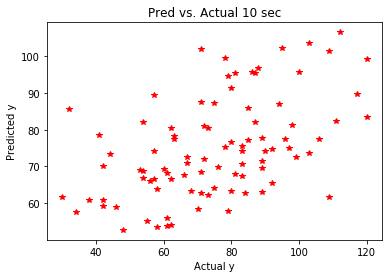

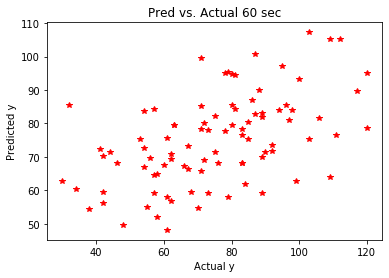

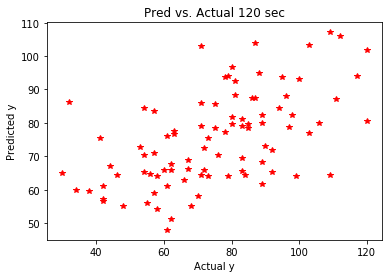

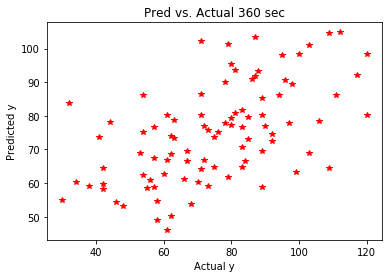

In [50]:
print(y_pred_out)
print(y_test_out)

plt.title('Pred vs. Actual 10 sec')
plt.plot(y_test_out[0],y_pred_out[0],'r*')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

plt.title('Pred vs. Actual 60 sec')
plt.plot(y_test_out[3],y_pred_out[3],'r*')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

plt.title('Pred vs. Actual 120 sec')
plt.plot(y_test_out[5],y_pred_out[5],'r*')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

plt.title('Pred vs. Actual 360 sec')
plt.plot(y_test_out[9],y_pred_out[9],'r*')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()



In [51]:
print(len(y))


# feature_df = data_filter[['AoM_Pel_tilt', 'AoM_Pel_ro', 'AoM_Pel_oblq', 'AoM_Pel_norm',
#     'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#     'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_US_norm',
#     'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#     'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#     'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#     'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#     'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#     'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#     'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
#     'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#     'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#     'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#     'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#     'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#     'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#     'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
#     ]]

feature_importance = pd.DataFrame({'Feature': feature_df.columns,
                                   'Importance': regressor.feature_importances_})
feature_importance.sort_values(by=['Importance'], ascending=False)



91


,Feature,Importance
5,AoM_Ankle_US_y,0.089088
12,SC_Gyr_norm_mean,0.063515
20,DLS_L_Gyr_norm_rms,0.060257
3,AoM_Pel_norm,0.057981
2,AoM_Pel_oblq,0.054119
4,AoM_Ankle_US_x,0.040624
18,SC_Gyr_norm_rms,0.037682
15,SC_Gyr_norm_range,0.035655
10,AoM_Ankle_AS_z,0.033294
9,AoM_Ankle_AS_y,0.031168
